### Example for using LCDB 1.1 data

By: Cheng Yan, Tom Viering

In [665]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import warnings
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from tabulate import tabulate
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [666]:
# OpenML dataset ID
# This indicates which dataset is used
dataset_ids = [3, 6, 11, 12, 14, 15, 16, 18, 22, 23, 28, 29, 31, 32, 37, 38, 44, 46, 50, 54, 151, 182, 188, 300, 307, 458, 469, 554, 1049, 1050, 1053, 1063, 1067, 1068, 1461, 1462, 1464, 1468, 1475, 1478, 1480, 1485, 1486, 1487, 1489, 1494, 1497, 1501, 1510, 1590, 4134, 4534, 4538, 6332, 23381, 23517, 40499, 40668, 40670, 40701, 40923, 40927, 40966, 40975, 40978, 40979, 40982, 40983, 40984, 40994, 40996, 41027]

# anchor definition
# Anchor is a different term for the training set size 
anchor_list_denser = np.ceil(16 * 2 ** ((np.arange(137)) / 8)).astype(int)

# learners
# Different machine learning algorithms
learner_zoo = [ 'SVC_linear', 'SVC_poly', 'SVC_rbf', 'SVC_sigmoid', 'DecisionTree', 'ExtraTree','LogisticRegression', 'PassiveAggressive', 'Perceptron', 'RidgeClassifier', 'SGDClassifier', 'MLPClassifier', 'LDA', 'QDA', 'BernoulliNB', 'MultinomialNB', 'ComplementNB', 'GaussianNB','KNN', 'NearestCentroid', 'ens.ExtraTrees', 'ens.RandomForest', 'ens.GradientBoosting','DummyClassifier']

In [667]:
len(dataset_ids)

72

In [668]:
# load the error rate learning curves database 1.1
file_path = 'LCDB11_ER_CC18_noFS_real.hdf5'
with h5py.File(file_path, 'r') as hdf_file:
    dataset = hdf_file['error_rate'][...]
    print("Shape of dataset", dataset.shape)
    print("(dataset, learner, outer split, inner split, anchor, train-val-test)")

Shape of dataset (72, 24, 5, 5, 137, 3)
(dataset, learner, outer split, inner split, anchor, train-val-test)


### Visualization

Below we visualize a single learning curve, that is for a single train / validation / test split. 

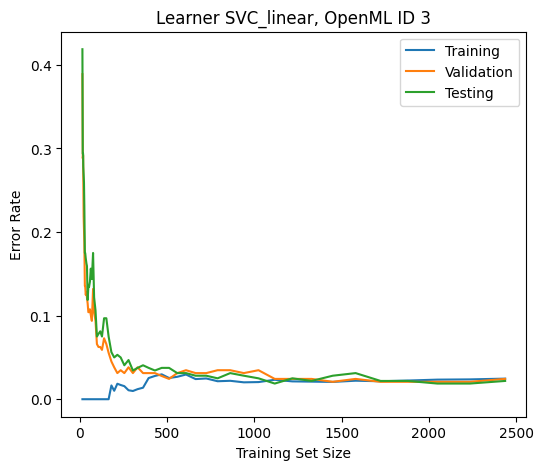

In [669]:
dataset_index = 0
learner_index = 0
outer_split = 0
inner_split = 0

plt.figure(figsize=(6, 5))
plt.plot(anchor_list_denser, dataset[dataset_index, learner_index, outer_split, inner_split,:, 0], label="Training")
plt.plot(anchor_list_denser, dataset[dataset_index, learner_index, outer_split, inner_split,:, 1], label="Validation")
plt.plot(anchor_list_denser, dataset[dataset_index, learner_index, outer_split, inner_split,:, 2], label="Testing")
plt.title(f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}')
plt.legend()
plt.xlabel('Training Set Size')
plt.ylabel('Error Rate')
plt.show()

Below we visualize the curve when we average over the different train / validation / test sets. We show the error rate on the validation set. The curve shows the mean learning curve, and the shaded area indicates the standard deviation over multiple train / val / test sets. 

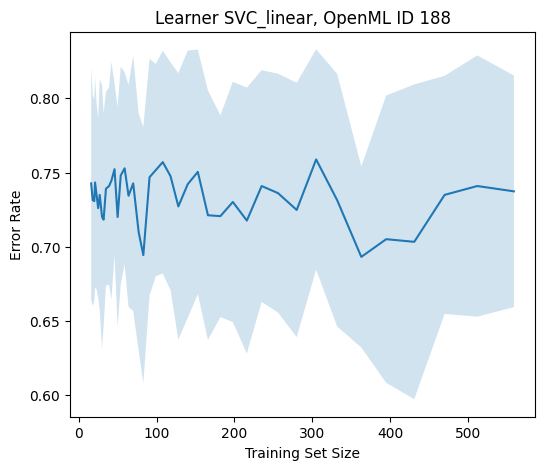

In [670]:
dataset_index = 22
learner_index = 0
train_val_test = 1 # validation

plt.figure(figsize=(6, 5))
mean_curve = np.nanmean(dataset[dataset_index, learner_index, :, :, :, train_val_test], axis=(0, 1))
std_curve = np.nanstd(dataset[dataset_index, learner_index, :, :, :, train_val_test], axis=(0, 1))
plt.plot(anchor_list_denser, mean_curve, label='LCDB 1.1')
plt.fill_between(anchor_list_denser, mean_curve - std_curve, mean_curve + std_curve, alpha=0.2)
plt.title(f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}')
plt.xlabel('Training Set Size')
plt.ylabel('Error Rate')
plt.show()

In [671]:

X = anchor_list_denser
Y = dataset[dataset_index, learner_index, outer_split, inner_split, :, 1]


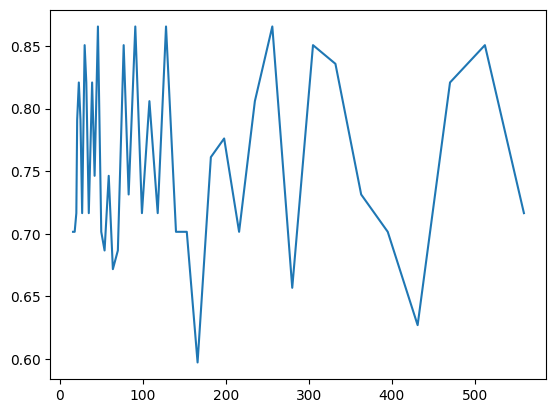

In [672]:
import matplotlib.pyplot as plt

mask = np.isnan(Y)
mask = np.logical_not(mask)

# remove the nan values
X = X[mask]
Y = Y[mask]
plt.plot(X, Y)






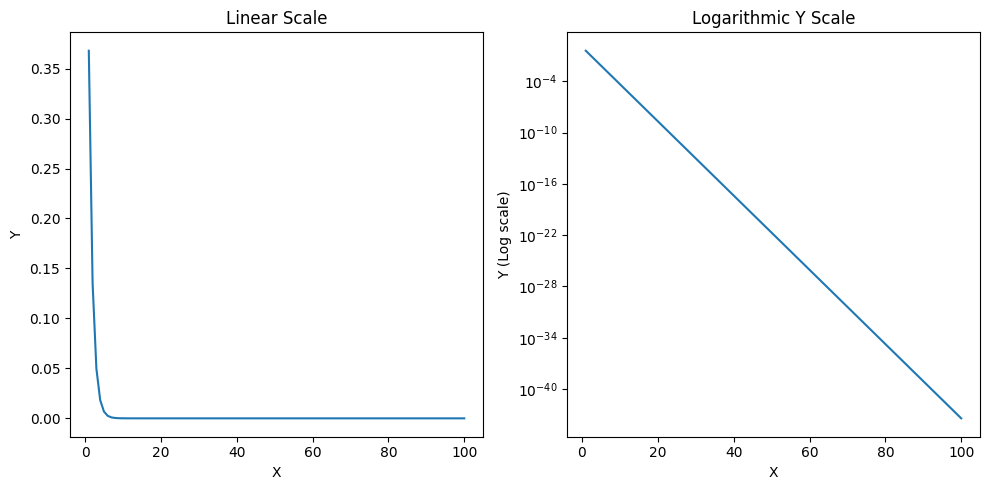

In [673]:
# Generate decreasing exponential data
# Increase the range of x (up to 100 instead of 10)
x = np.linspace(1, 100, 100)
y = np.exp(-x)  # Negative exponent to make it decay

# Plot the data on a regular scale
plt.figure(figsize=(10, 5))

# Original plot (linear scale)
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title("Linear Scale")
plt.xlabel("X")
plt.ylabel("Y")


# Plot with logarithmic scale on the y-axis
plt.subplot(1, 2, 2)
plt.plot(x, y)
plt.yscale('log')
plt.title("Logarithmic Y Scale")
plt.xlabel("X")
plt.ylabel("Y (Log scale)")


# Show the plot
plt.tight_layout()
plt.show()

In [674]:


def log_base(Y, base):
    return np.log(Y) / np.log(base)

def func(x, a, b, c): 
    return  a * np.exp(-b * x) + c

def pow3func(x, a, k, c):
    return a * x**(-k) + c

def log2func(x, a, c):
    return -a * np.log(x) + c

def func_with_logY(x, a, b, c):
    return  np.log(a * np.exp(-b * x) + c)


def func_with_log10Y(x, a, b, c):
    return np.log10(a * np.exp(-b * x) + c)


def func_with_log100Y(x, a, b, c):
    return log_base(a * np.exp(-b * x) + c, 100)




def func_with_expY(x, a, b, c):
    return  np.exp(a * np.exp(-b * x) + c)

def func_with_logX2(x, a, b, c):
    return  a * np.exp(-b * np.log(x)) + c


def func_with_expX2(x, a, b, c):
    return a * np.exp(-b * np.exp(x)) + c

def func_with_logX(x, a, b, c):
    return  a * x**(-b) + c

def func2(x, a):
    return a * np.exp(x)

def func3(x, a):
    return np.log(func2(x, a))

def func_but_only_bias_part(x, a, b, c):
    def newFunc(x, c):
        a * np.exp(-b * x) + c
    return newFunc




def funcLogData(x, a):
    return a * np.log(x)

def funcLogDataInverse(x, a):
    return np.exp(funcLogData(x,a))

def boxCox(x, lambda_val=None):

    if np.any(x <= 0):
        raise ValueError("All data values must be positive for Box-Cox transformation.")
    
    transformed_data, optimal_lambda = boxcox(x, lmbda=lambda_val)
    return transformed_data

def boxCoxInverse(x, lambda_val):
    original_data = inv_boxcox(x, lambda_val)
    return original_data
    
def min_max_scale(data, feature_range=(-1, 1)):
    """
    Scales data to a specified range using Min-Max scaling.
    
    Parameters:
    - data (array-like): The data to scale.
    - feature_range (tuple): Desired range of transformed data (default is (-1, 1)).
    
    Returns:
    - scaled_data (array-like): Data scaled to the specified range.
    - data_min (float): The minimum value of the original data.
    - data_max (float): The maximum value of the original data.
    """
    min_val, max_val = feature_range
    data_min = np.min(data)
    data_max = np.max(data)
    
    # Scale data to the range [0, 1]
    scaled_data = (data - data_min) / (data_max - data_min)
    # Map to the specified range
    scaled_data = scaled_data * (max_val - min_val) + min_val
    
    return scaled_data, data_min, data_max

def inverse_min_max_scale(scaled_data, data_min, data_max, feature_range=(-1, 1)):
    """
    Reverses Min-Max scaling to map scaled data back to its original range.
    
    Parameters:
    - scaled_data (array-like): The scaled data.
    - data_min (float): The minimum value of the original data.
    - data_max (float): The maximum value of the original data.
    - feature_range (tuple): The range used during scaling (default is (-1, 1)).
    
    Returns:
    - original_data (array-like): Data mapped back to its original range.
    """
    min_val, max_val = feature_range
    
    # Reverse the mapping from the specified range back to [0, 1]
    scaled_data = (scaled_data - min_val) / (max_val - min_val)
    # Reverse the scaling to the original data range
    original_data = scaled_data * (data_max - data_min) + data_min
    
    return original_data

        

In [675]:
#scalars

def logScalar(x):
    return np.log(x)

def expScalar(x):
    return np.exp(x)

In [676]:
# plotting graphs code
def plot_graphs(i):
    try:
        dataset_index = i
        learner_index = 0
        train_val_test = 1  # validation

        plt.figure(figsize=(6, 5))
        mean_curve = np.nanmean(
            dataset[dataset_index, learner_index, :, :, :, train_val_test], axis=(0, 1))
        std_curve = np.nanstd(
            dataset[dataset_index, learner_index, :, :, :, train_val_test], axis=(0, 1))

        X = anchor_list_denser
        Y = dataset[dataset_index, learner_index,
                    outer_split, inner_split, :, 1]
        mask = np.isnan(Y)
        mask = np.logical_not(mask)

        # remove the nan values
        X = X[mask]
        Y = Y[mask]
        a = np.random.uniform(0, 1)
        b = np.random.uniform(0, 1)
        c = np.random.uniform(0, 1)

        poptbogus_log, pcov_log, infodictbogus_log, mesgbogus_log, ierbogus_log = curve_fit(
            func, X, Y, p0=[a, b, c], method="trf", full_output=True)

        plt.plot(X, func(X, *poptbogus_log), label="function")
        plt.plot(X, mean_curve, label="data")

        # Add horizontal line at Y = 0.01
        plt.axhline(y=0.03, color='r', linestyle='--', label='Y = 0.03')

        # plt.plot(anchor_list_denser, mean_curve, label='LCDB 1.1')
        plt.fill_between(anchor_list_denser, mean_curve - std_curve, mean_curve + std_curve, alpha=0.2)
        plt.title(
            f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}, real ID {dataset_index}')
        plt.xlabel('Training Set Size')
        plt.ylabel('Error Rate')
        plt.legend()
        # plt.ylim(0, 1)
        plt.show()
    except Exception as e:
        plot_graphs(i)

In [677]:
def plot_all_graphs():
    for i in range(len(dataset)):
        plot_graphs(i)


In [678]:
#plot_all_graphs()
#plot_graphs(0)

In [679]:
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu, wilcoxon
from scipy.optimize import minimize
import pandas as pd
# TODO: Implement the curve model y=a*exp(-b*x)+c and fit it using curve_fit

#Y = np.log(Y)
#X = np.log(X)
#plt.plot(X, Y)
#plt.show()

#plt.plot(X, Y)
#plt.xscale('log')
#plt.show()





#pcov
#NOT EXPERIMENT CODE for Y axis scaling
def experiment_with_scaling(dataset_id, learner_id):

   
    train_val_test = 2
    X = anchor_list_denser
    Y = np.nanmean(dataset[dataset_id, learner_id, :, :, :, train_val_test], axis=(0, 1))

    mask = ~np.isnan(Y)  # Mask for non-NaN values
    X = X[mask]
    Y = Y[mask]
    a = np.random.uniform(0, 1)
    b = np.random.uniform(0, 1)
    c = np.random.uniform(0, 1)
    plt.scatter(X, Y)
    plt.xlabel('training set size')
    plt.ylabel('error rate')
    # plt.xscale("log")
    plt.legend()
    plt.show()
    popt, pcov, infodict, mesg, ier = curve_fit(func, X, Y, method= "lm", p0=[a,b,c], full_output=True)
    #print(popt)
    plt.plot(X, func(X, *popt), 'g-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    
    plt.scatter(X, Y)
    plt.xlabel('training set size')
    plt.ylabel('error rate')
    #plt.xscale("log")
    plt.legend()
    plt.show()

    popt2, pcov2, infodict2, mesg2, ier2 = curve_fit(
        func_with_logY, X, np.log(Y), method="lm", p0=[a, b, c], full_output=True)


    
    
    print(popt2)    
    #print(sum(infodict["fvec"] **2))
    print(infodict2["nfev"])

    plt.plot(X, func_with_logY(X, *popt2), 'g-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
    plt.scatter(X, func_with_logY(X, *popt2))
    plt.xlabel('training set size')
    plt.ylabel('error rate')
    plt.legend()
    plt.show()
    
    #popt3, pcov3, infodict3, mesg3, ier3 = curve_fit(func(X, *popt2), X, Y, method="trf", full_output=True)
    #print(popt3)  
    #print(infodict3["nfev"])
    plt.plot(X, func(X, *popt2), 'g-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
    plt.plot(X, func(X, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

    plt.plot(X, Y)
    plt.xlabel('training set size')
    plt.ylabel('error rate')
    plt.legend()
    plt.show()


    y_pred = func(X, *popt)
    mse = mean_squared_error(Y, y_pred)  # Calculate MSE
    print(y_pred)
    print(f"X: {X}")
    print(f"Y: {Y}")

    y_pred2 = func_with_logX2(X, *popt2)
    mse2 = mean_squared_error(Y, y_pred2)  # Calculate MSE
    print(y_pred2)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Squared Error2: {mse2}")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


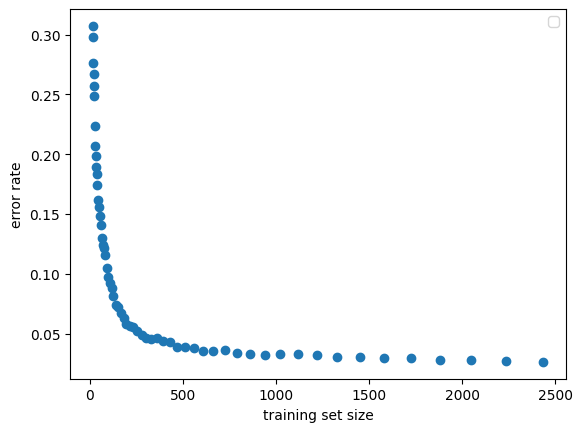

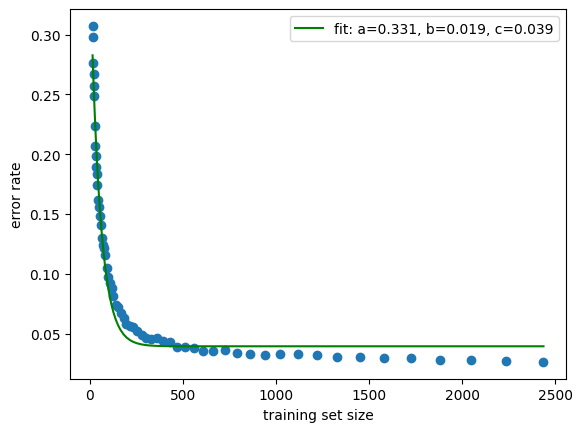

[0.25135571 0.01206805 0.03363561]
73


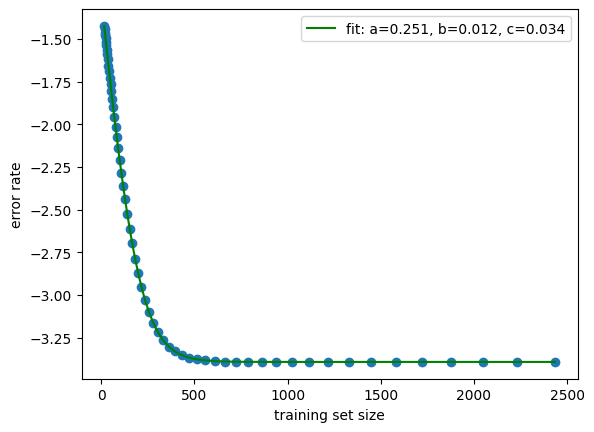

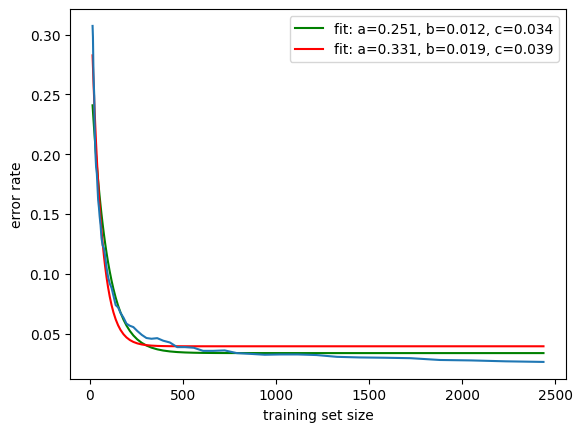

[0.28264584 0.27348525 0.26466955 0.26038695 0.25206438 0.24405514
 0.23634744 0.22532656 0.21832396 0.20831128 0.19582681 0.18707257
 0.17615722 0.1660483  0.15668622 0.1459502  0.13619633 0.12566218
 0.11481125 0.10660267 0.09702938 0.08881838 0.08096911 0.07369887
 0.06769797 0.06186317 0.0568882  0.05301153 0.04939424 0.0467332
 0.04457051 0.0429689  0.04176139 0.04086338 0.04027835 0.03989409
 0.03964029 0.039497   0.0394127  0.03936807 0.03934589 0.03933526
 0.03933078 0.03932896 0.03932829 0.03932808 0.03932801 0.039328
 0.03932799 0.03932799 0.03932799 0.03932799 0.03932799 0.03932799
 0.03932799 0.03932799 0.03932799 0.03932799 0.03932799]
X: [  16   18   20   21   23   25   27   30   32   35   39   42   46   50
   54   59   64   70   77   83   91   99  108  118  128  140  153  166
  182  198  216  235  256  280  305  332  363  395  431  470  512  559
  609  664  725  790  862  940 1024 1117 1218 1328 1449 1580 1723 1879
 2048 2234 2436]
Y: [0.30725  0.297875 0.276    0.267375

In [680]:
#for i in range(len(dataset_ids)):
  # experiment_with_scaling(i, 0)

experiment_with_scaling(0, 0)

In [681]:
# pcov
# NOT EXPERIMENT CODE for Y axis scaling
def experiment_with_scaling3(dataset_id, learner_id):

    
    train_val_test = 2
    X = anchor_list_denser
    Y = np.nanmean(dataset[dataset_id, learner_id, :, :, :, train_val_test], axis=(0, 1))

    # Mask for non-NaN values
    mask = ~np.isnan(Y)
    X = X[mask]
    Y = Y[mask]

    # Split the data into 80% fitting and 20% extrapolation
    split_index = int(0.8 * len(X))
    X_fitting, X_extrapolation = X[:split_index], X[split_index:]
    Y_fitting, Y_extrapolation = Y[:split_index], Y[split_index:]
    a = np.random.uniform(0, 1)
    b = np.random.uniform(0, 1)
    c = np.random.uniform(0, 1)
    # Uniformly select 20% from the fitting data as interpolation
    num_interpolation = int(0.2 * len(X_fitting))
    indices = np.linspace(0, len(X_fitting) - 1, num_interpolation, dtype=int)

    X_interpolation = X_fitting[indices]
    Y_interpolation = Y_fitting[indices]

    # Remove the selected interpolation points from the fitting data
    X_fitting_final = np.delete(X_fitting, indices)
    Y_fitting_final = np.delete(Y_fitting, indices)
    popt, pcov, infodict, mesg, ier = curve_fit(
        func, X_extrapolation, Y_extrapolation, method="lm", p0=[a, b, c], full_output=True)
    # Scatter plot with different colors
    plt.scatter(X_fitting_final, Y_fitting_final, color='blue', label='Fitting (64%)')
    plt.scatter(X_interpolation, Y_interpolation, color='green', label='Interpolation (20% of fitting)')
    plt.scatter(X_extrapolation, Y_extrapolation, color='red', label='Extrapolation (20%)')

    plt.xlabel('training set size')
    plt.ylabel('error rate')
    plt.title('Data Split Visualization')
    plt.legend()
    #plt.plot(X, func(X, *popt), 'g-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
    plt.show()

    
    plt.scatter(X, Y)
    plt.xlabel('training set size')
    plt.ylabel('error rate')
    # plt.xscale("log")
    plt.legend()
    plt.show()

    # print(popt)


    plt.scatter(X, Y)
    plt.xlabel('training set size')
    plt.ylabel('error rate')
    # plt.xscale("log")
    plt.legend()
    plt.show()

    popt2, pcov2, infodict2, mesg2, ier2 = curve_fit(
        func_with_logY, X, np.log(Y), method="lm", p0=[a, b, c], full_output=True)

    print(popt2)
    # print(sum(infodict["fvec"] **2))
    print(infodict2["nfev"])

    plt.plot(X, func_with_logY(X, *popt2), 'g-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
    plt.scatter(X, func_with_logY(X, *popt2))
    plt.xlabel('training set size')
    plt.ylabel('error rate')
    plt.legend()
    plt.show()

    # popt3, pcov3, infodict3, mesg3, ier3 = curve_fit(func(X, *popt2), X, Y, method="trf", full_output=True)
    # print(popt3)
    # print(infodict3["nfev"])
    plt.plot(X, func(X, *popt2), 'g-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
    plt.plot(X, func(X, *popt), 'r-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

    plt.plot(X, Y)
    plt.xlabel('training set size')
    plt.ylabel('error rate')
    plt.legend()
    plt.show()

    y_pred = func(X, *popt)
    mse = mean_squared_error(Y, y_pred)  # Calculate MSE
    print(y_pred)
    print(f"X: {X}")
    print(f"Y: {Y}")

    y_pred2 = func_with_logX2(X, *popt2)
    mse2 = mean_squared_error(Y, y_pred2)  # Calculate MSE
    print(y_pred2)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Squared Error2: {mse2}")

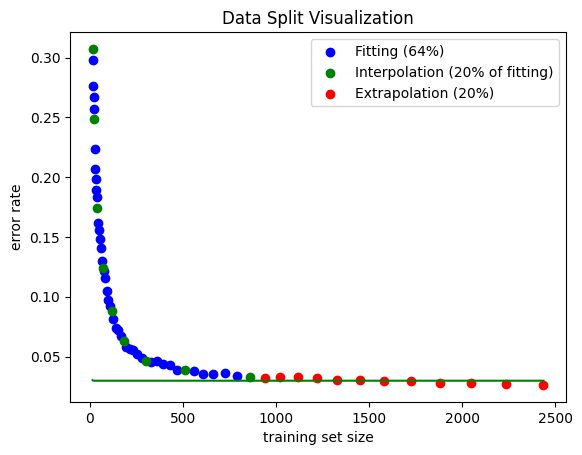

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


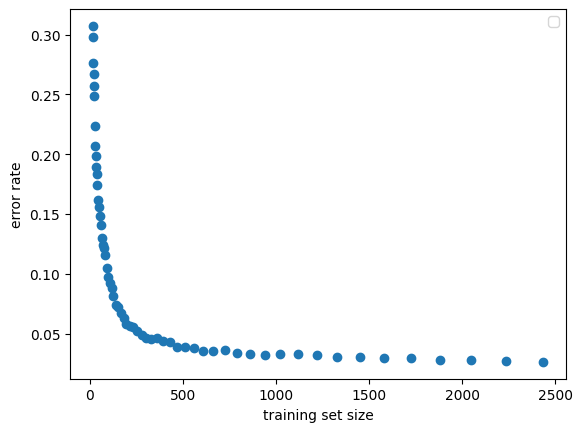

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


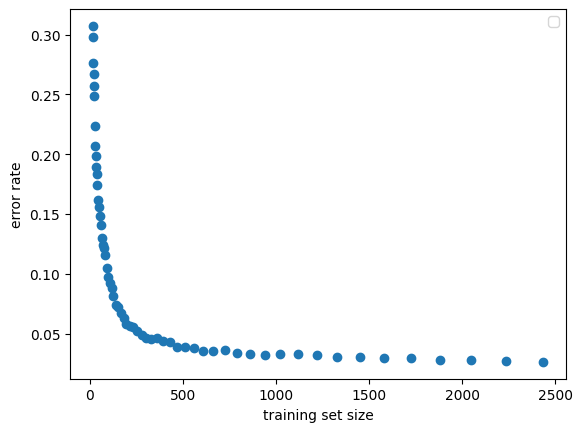

[-27.43108895   2.44689693   0.07229565]
32


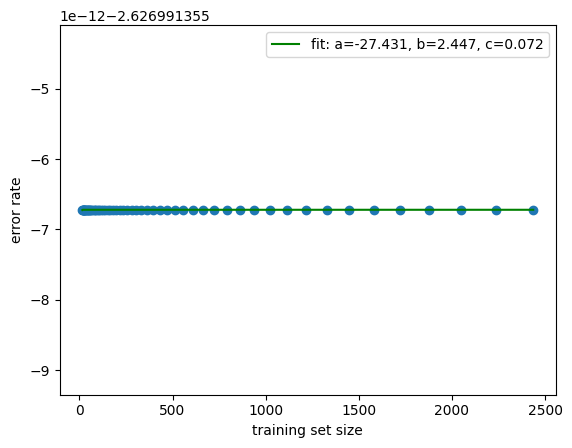

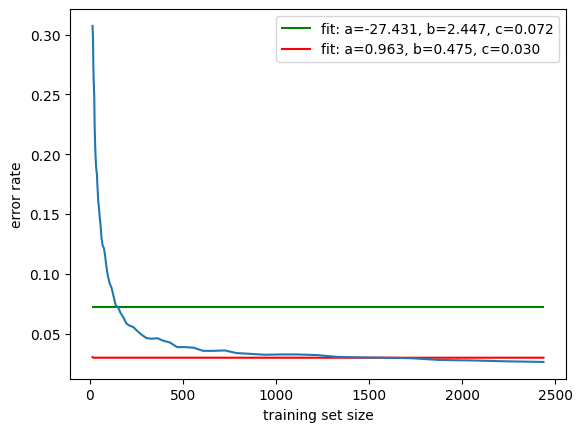

[0.03024924 0.02995569 0.02984226 0.02981524 0.02978799 0.02977746
 0.0297734  0.02977145 0.02977107 0.02977089 0.02977084 0.02977084
 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083
 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083
 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083
 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083
 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083
 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083
 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083
 0.02977083 0.02977083 0.02977083 0.02977083 0.02977083]
X: [  16   18   20   21   23   25   27   30   32   35   39   42   46   50
   54   59   64   70   77   83   91   99  108  118  128  140  153  166
  182  198  216  235  256  280  305  332  363  395  431  470  512  559
  609  664  725  790  862  940 1024 1117 1218 1328 1449 1580 1723 1879
 2048 2234 2436]
Y: [0.30725  0.297875 0.276    0.267

In [682]:
experiment_with_scaling3(0, 0)

In [683]:
# pcov
# NOT EXPERIMENT CODE for X axis scaling
def experiment_with_scaling2(dataset_id, learner_id):

    train_val_test = 2
    X = anchor_list_denser
    Y = np.nanmean(dataset[dataset_id, learner_id, :,
                   :, :, train_val_test], axis=(0, 1))

    mask = ~np.isnan(Y)  # Mask for non-NaN values
    X = X[mask]
    Y = Y[mask]
    a = np.random.uniform(0, 1)
    b = np.random.uniform(0, 1)
    c = np.random.uniform(0, 1)

    popt, pcov, infodict, mesg, ier = curve_fit(
        func, X, Y, method="lm", p0=[a, b, c], full_output=True)
    # print(popt)
    plt.plot(X, func(X, *popt), 'g-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

    plt.scatter(np.log(X), np.log(Y))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xscale("log")
    plt.legend()
    plt.show()

    popt2, pcov2, infodict2, mesg2, ier2 = curve_fit(
        func_with_log100Y, X, log_base(Y, 100), method="lm", p0=[a, b, c], full_output=True)

    print(popt2)
    # print(sum(infodict["fvec"] **2))
    print(infodict2["nfev"])

    plt.plot(X, func_with_log100Y(X, *popt2), 'g-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
    plt.scatter(X, log_base(Y, 100))
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    # popt3, pcov3, infodict3, mesg3, ier3 = curve_fit(func(X, *popt2), X, Y, method="trf", full_output=True)
    # print(popt3)
    # print(infodict3["nfev"])
    plt.plot(X, func(X, *popt2), 'g-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
    plt.plot(X, func(X, *popt), 'r-',
             label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

    plt.scatter(X, Y)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

    y_pred = func(X, *popt)
    mse = mean_squared_error(Y, y_pred)  # Calculate MSE
    print(y_pred)
    print(f"X: {X}")
    print(f"Y: {Y}")

    y_pred2 = func_with_logX2(X, *popt2)
    mse2 = mean_squared_error(Y, y_pred2)  # Calculate MSE
    print(y_pred2)

    print(f"Mean Squared Error: {mse}")
    print(f"Mean Squared Error2: {mse2}")

In [684]:
#for i in range(len(dataset_ids)):
   #experiment_with_scaling2(i, 0)

In [685]:
#Code for plotting stuff for X axis scaling
def plot_scaled_data(scalar, learner_index):
    # Assume `given_func` and `second_given_func` are defined
    for i in range(len(dataset_ids)):
        X = anchor_list_denser
        Y = np.nanmean(dataset[i, learner_index, :, :, :, train_val_test], axis=(0, 1))
        mask = np.isnan(Y)
        mask = np.logical_not(mask)


        X = X[mask]
        Y = Y[mask]
        popt, pcov, infodict, mesg, ier = curve_fit(
            func, X, Y, method="trf", full_output=True)
        
        popt2, pcov2, infodict2, mesg2, ier2 = curve_fit(
            func_with_expX2, np.log(X), Y, method="trf", full_output=True)
        
        print(popt)
        print(popt2)
        print(infodict["nfev"])
        print(infodict2["nfev"])
        plt.plot(X, func(X, *popt), 'g-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
        
        #plt.plot(X, func_with_logX2(np.log(X), *popt), 'o-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
        
        plt.plot(X, func_with_expX2(np.log(X), *popt2), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))

        plt.plot(X, Y)
        #plt.plot(X, scalar(Y))
        plt.legend()
        plt.show()



 

    
    
            
 
    
    
    

In [686]:
#plot_scaled_data(expScalar, 0)

In [687]:
# Code for plotting stuff but for Y axis
def plot_scaled_dataY(scalar, learner_index):
    # Assume `given_func` and `second_given_func` are defined
    for i in range(len(dataset_ids)):
        X = anchor_list_denser
        Y = np.nanmean(dataset[i, learner_index, :, :,
                       :, train_val_test], axis=(0, 1))
        mask = np.isnan(Y)
        mask = np.logical_not(mask)
        random_variables = []
        number_of_variables = 3
        for i in range(number_of_variables):
            random_variables.append(np.random.uniform(0, 1))
        X = X[mask]
        Y = Y[mask]
        popt, pcov, infodict, mesg, ier = curve_fit(func, X, Y, method="lm", p0=random_variables, full_output=True)

        popt2, pcov2, infodict2, mesg2, ier2 = curve_fit(func_with_logY, X, np.log(
            Y), method="lm", p0=random_variables, full_output=True)

        print(popt)
        print(popt2)
        print(infodict["nfev"])
        print(infodict2["nfev"])
        plt.plot(X, func(X, *popt), 'g-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

        # plt.plot(X, func_with_logX2(np.log(X), *popt), 'o-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

        plt.plot(X, func(X, *popt2), 'r-',
                 label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))

        plt.plot(X, Y)
        #plt.plot(X, np.log(Y))
        plt.legend()
        plt.show()

In [688]:
#plot_scaled_dataY(logScalar, 0)

In [689]:
#Replacement for curve fit
#I suspect that scaling only causes the loss function being optimised to be different when curve fitting

# Define the loss function (L1 norm)
def my_absolute_distance(params, x, y, model, scalar=None):
    a, b = params  # Unpack parameters
    predictions = model(x, a, b)
    if (scalar == None):
        return np.sum(np.abs(predictions - y))    
    else:
        return scalar(np.sum(np.abs(predictions - y)))



def my_mean_squared_error(params, x, y, model, scalar=None):
    a, b = params  # Unpack parameters
    predictions = model(x, a, b)
    if (scalar == None):
        return np.mean((predictions - y) ** 2)
    else:
        return scalar(np.mean((predictions - y) ** 2))

In [690]:
#CHECKING HOW LOSS FUNCTION WORKS
def fit_curve_for_learner_with_minimize(learner_id, dataset_id, given_func, scalar, inverse_scalar, loss_function, bool_plot):
        def scale_given_func(f):
            def new_func(*args, **kwargs):
                result = f(*args, **kwargs)
                return scalar(result)
            return new_func
        try:
            X = anchor_list_denser
            Y = np.nanmean(dataset[dataset_id, learner_id, :, :, :, train_val_test], axis=(0, 1))
            # TODO add different inner and outer split and take the mean, add histogram, add interpolation, maybe use different initilisation parameters.  sigmoid

            mask = ~np.isnan(Y)  # Mask for non-NaN values
            X = X[mask]
            Y = Y[mask]

            # Split the data
            data = np.column_stack((X, Y))
            split_ratio = 0.8  # Adjust the ratio for fitting/extrapolation
            split_index = int(len(data) * split_ratio)

            # Split into fitting and extrapolation sets
            fitting_data = data[:split_index]
            extrapolation_data = data[split_index:]

            X_fit, Y_fit = fitting_data[:, 0], fitting_data[:, 1]
            X_extrap, Y_extrap = extrapolation_data[:, 0], extrapolation_data[:, 1]
            X_all, Y_all = data[:, 0], data[:, 1]

            best_mse_extrap_no_scalar = float('inf')
            best_mse_extrap_with_scalar = float('inf')
            best_mse_interp_no_scalar = float('inf')
            best_mse_interp_with_scalar = float('inf')
            best_mse_all_with_scalar = float('inf')
            best_mse_all_no_scalar = float('inf')

            popt1_interpol = None
            popt2_interpol = None
            popt1_extrap = None
            popt2_extrap = None
            popt1_all = None
            popt2_all = None

            for i in range(20):
                try:
                    # Generate random initial parameters
                    a = np.random.uniform(0, 1)
                    b = np.random.uniform(0, 1)
                    c = np.random.uniform(0, 1)
                    popt1 = None
                    popt2 = None
                    # Fit the curve using the fitting data usign my own loss function


                    # Initial guess for parameters
                    initial_guess = [1, 1]

                    # Minimize the MSE loss
                    result = minimize(
                        loss_function, initial_guess, args=(X_fit, Y_fit, scalar))

                    # Extract the optimal parameters
                    a_opt, b_opt = result.x
                    print(f"Optimal parameters: a = {a_opt}, b = {b_opt}")

                    # Generate the fitted curve
                    fitted_curve = model(x_data, a_opt, b_opt)
                    try:
                        popt1, pcov1, infodict1, mesg1, ier1 = curve_fit(
                            given_func, X_fit, Y_fit, p0=[a, b, c], method="lm", full_output=True
                        )
                    except Exception as e:
                        print(f"Curve fitting failed for given_func: {e}, iteration: {i}, dataset: {dataset_id}")
                        continue

                    # Logarithmic transformation and cleaning
                    scaled_func = scale_given_func(given_func)
                    scaledY_fit = scalar(Y_fit)
                    scaledMask = ~np.isnan(scaledY_fit) & np.isfinite(scaledY_fit)
                    scaledX_fit = X_fit[scaledMask]
                    scaledY_fit = scaledY_fit[scaledMask]

                    try:
                        popt2, pcov2, infodict2, mesg2, ier2 = curve_fit(
                            scaled_func, scaledX_fit, scaledY_fit, p0=[a, b, c], method="lm", full_output=True
                        )
                    except Exception as e:
                        print(f"Curve fitting failed for second_given_func: {e}, iteration: {i}, dataset: {dataset_id}")
                        continue

                    # Predictions
                    inverse_scalar(scaled_func(X_fit, *popt2))

                    Y_interpolation_pred_no_scalar = given_func(X_fit, *popt1)
                    Y_interpolation_pred_with_scalar = inverse_scalar(scaled_func(X_fit, *popt2))
                    Y_extrap_pred_no_scalar = given_func(X_extrap, *popt1)
                    Y_extrap_pred_with_scalar = inverse_scalar(scaled_func(X_extrap, *popt2))
                    Y_all_pred_no_scalar = given_func(X_all, *popt1)
                    Y_all_pred_with_scalar = inverse_scalar(scaled_func(X_all, *popt2))

                    # Ensure predictions are valid before computing MSE
                    if (
                        np.any(np.isnan(Y_extrap_pred_no_scalar)) or np.any(np.isnan(Y_extrap_pred_with_scalar)) or
                        np.any(np.isnan(Y_interpolation_pred_no_scalar)) or np.any(np.isnan(Y_interpolation_pred_with_scalar)) or
                        np.any(np.isnan(Y_all_pred_no_scalar)) or np.any(np.isnan(Y_all_pred_with_scalar))
                    ):
                        print(f"NaN detected in predictions; skipping iteration {i} dataset {dataset_id}")
                        continue

                    # Compute MSE
                    mse_extrap_no_scalar = mean_squared_error(Y_extrap, Y_extrap_pred_no_scalar)
                    mse_extrap_with_scalar = mean_squared_error(Y_extrap, Y_extrap_pred_with_scalar)
                    mse_interp_no_scalar = mean_squared_error(Y_fit, Y_interpolation_pred_no_scalar)
                    mse_interp_with_scalar = mean_squared_error(Y_fit, Y_interpolation_pred_with_scalar)
                    mse_all_no_scalar = mean_squared_error(Y_all, Y_all_pred_no_scalar)
                    mse_all_with_scalar = mean_squared_error(Y_all, Y_all_pred_with_scalar)

                    # Update best MSEs
                    if mse_extrap_no_scalar < best_mse_extrap_no_scalar:
                        popt1_extrap = popt1
                        best_mse_extrap_no_scalar = mse_extrap_no_scalar

                    if mse_extrap_with_scalar < best_mse_extrap_with_scalar:
                        popt2_extrap = popt2
                        best_mse_extrap_with_scalar = mse_extrap_with_scalar

                    if mse_interp_no_scalar < best_mse_interp_no_scalar:
                        popt1_interpol = popt1
                        best_mse_interp_no_scalar = mse_interp_no_scalar

                    if mse_interp_with_scalar < best_mse_interp_with_scalar:
                        popt2_interpol = popt2
                        best_mse_interp_with_scalar = mse_interp_with_scalar

                    if mse_all_no_scalar < best_mse_all_no_scalar:
                        popt1_all = popt2
                        best_mse_all_no_scalar = mse_all_no_scalar

                    if mse_all_with_scalar < best_mse_all_with_scalar:
                        popt2_all = popt2
                        best_mse_all_with_scalar = mse_all_with_scalar

                except Exception as e:
                    print(f"Error in iteration {i}: {e}")
                    continue


            # Calculate the difference in MSE
            mse_difference = best_mse_extrap_no_scalar - best_mse_extrap_with_scalar
            # Print MSE results and their difference
            # print(f"MSE for the first function (given_func): {best_mse_extrap_no_scalar}")
            # print(f"MSE for the second function (second_given_func): {best_mse_extrap_with_scalar}")
            # print(f"Difference in MSE (fit1 - fit2): {mse_difference}")

            if bool_plot:
                plt.figure(figsize=(10, 6))

                plt.scatter(X, Y, label="Original Data", alpha=0.6)

                plt.scatter(X_fit, Y_fit, label="Fitting Data", color="blue", alpha=0.8)

                plt.scatter(X_extrap, Y_extrap, label="Extrapolation Data", color="orange", alpha=0.8)

                try:
                    X_range = np.linspace(min(X), max(X), 500)  # Fine-grained X for smooth curve
                    # plot curve of function over all data
                    plt.plot(X_range, given_func(X_range, *popt1_interpol),'g-',label=f'Fit: params={tuple(popt1_interpol)} a*np.exp(-b*x) + c')
                    # plot range of scaled function over all data
                    plt.plot(X_range, inverse_scalar(scalar(given_func(X_range, *popt2_interpol))),'r-',label=f'Fit: params={tuple(popt2_interpol)} np.exp(np.log(a*np.exp(-b*x) + c))')
                    plt.title(f'Learner {learner_zoo[learner_id]}, OpenML ID {dataset_ids[dataset_id]}, best interpolations')
                    plt.legend()
                    plt.show()


                    plt.figure(figsize=(10, 6))
                    plt.scatter(X, Y, label="Original Data", alpha=0.6)
                    plt.scatter(X_fit, Y_fit, label="Fitting Data", color="blue", alpha=0.8)
                    plt.scatter(X_extrap, Y_extrap, label="Extrapolation Data", color="orange", alpha=0.8)
                    X_range = np.linspace(min(X), max(X), 500)  # Fine-grained X for smooth curve
                    plt.plot(X_range, given_func(X_range, *popt1_extrap),'g-',label=f'Fit: params={tuple(popt1_extrap)} a*np.exp(-b*x) + c')
                    plt.plot(X_range, inverse_scalar(scalar(given_func(X_range, *popt2_extrap))),'r-',label=f'Fit: params={tuple(popt2_extrap)} np.exp(np.log(a*np.exp(-b*x) + c))')
                    plt.title(f'Learner {learner_zoo[learner_id]}, OpenML ID {dataset_ids[dataset_id]}, best extrapolation')
                    plt.legend()
                    plt.show()

                    plt.figure(figsize=(10, 6))
                    # plt.scatter(X, Y, label="Original Data", alpha=0.6)
                    plt.scatter(X_fit, Y_fit, label="Fitting Data", color="blue", alpha=0.8)
                    plt.scatter(X_extrap, Y_extrap, label="Extrapolation Data", color="orange", alpha=0.8)
                    X_range = np.linspace(min(X), max(X), 500)  # Fine-grained X for smooth curve
                    plt.plot(X_range, given_func(X_range, *popt1_all),'g-',label=f'Fit: params={tuple(popt1_all)} a*np.exp(-b*x) + c')
                    plt.plot(X_range, inverse_scalar(scalar(given_func(X_range, *popt2_all))),'r-',label=f'Fit: params={tuple(popt2_all)} np.exp(np.log(a*np.exp(-b*x) + c))')
                    plt.title(f'Learner {learner_zoo[learner_id]}, OpenML ID {dataset_ids[dataset_id]}, best extrapolation')
                    plt.legend()
                    plt.show()

                except Exception as e:
                    print("bad")


            return best_mse_extrap_no_scalar, best_mse_extrap_with_scalar, best_mse_interp_no_scalar, best_mse_interp_with_scalar, best_mse_all_no_scalar, best_mse_all_with_scalar, mse_difference

        except RuntimeError or ValueError:
            # print(dataset_id)
            # print(learner_id)
            X = anchor_list_denser
            Y = dataset[dataset_id, learner_id, outer_split, inner_split, :, 1]

            mask = ~np.isnan(Y)  # Mask for non-NaN values
            X = X[mask]
            Y = Y[mask]
            return None, None, None, None, None
            # plt.plot(X, Y)
            # plt.show()

In [691]:
#Experiment code for model with 3 parameters and Y scaling
def fit_curve_for_learner(learner_id, dataset_id, given_func, scalar, inverse_scalar, bool_plot, bool_print_failed_stuff):
        def scale_given_func(f):
            def new_func(*args, **kwargs):
                result = f(*args, **kwargs)
                return scalar(result)
            return new_func
        try:
            train_val_test = 2
            X = anchor_list_denser
            Y = np.nanmean(dataset[dataset_id, learner_id, :, :, :, train_val_test], axis=(0, 1))
            # TODO add different inner and outer split and take the mean, add histogram, add interpolation, maybe use different initilisation parameters.  sigmoid

            mask = ~np.isnan(Y)  # Mask for non-NaN values
            X = X[mask]
            Y = Y[mask]

            # Split the data
            data = np.column_stack((X, Y))
            split_ratio = 0.8  # Adjust the ratio for fitting/extrapolation
            split_index = int(len(data) * split_ratio)

            # Split into fitting and extrapolation sets
            fitting_data = data[:split_index]
            extrapolation_data = data[split_index:]

            # Determine the number of interpolation points (20% of fitting data)
            num_interpolation = int(0.2 * len(fitting_data))

            # Select uniformly spread interpolation points
            interpolation_indices = np.linspace(
                0, len(fitting_data) - 1, num_interpolation, dtype=int)
            interpolation_data = fitting_data[interpolation_indices]

            # Ensure Y values are greater than 0.00001
            Y_fit = np.maximum(fitting_data[:, 1], 0.00001)
            Y_interp = np.maximum(interpolation_data[:, 1], 0.00001)
            Y_extrap = np.maximum(extrapolation_data[:, 1], 0.00001)
            Y_all = np.maximum(data[:, 1], 0.00001)

            # Extract X values (these remain unchanged)
            X_fit = fitting_data[:, 0]
            X_interp = interpolation_data[:, 0]
            X_extrap = extrapolation_data[:, 0]
            X_all = data[:, 0]

            best_mse_extrap_no_scalar = float('inf')
            best_mse_extrap_with_scalar = float('inf') 
            best_mse_interp_no_scalar = float('inf')
            best_mse_interp_with_scalar = float('inf')
            best_mse_all_with_scalar = float('inf')
            best_mse_all_no_scalar = float('inf')
            


            #ONLY USE POPT1_ALL AND POPT2_ALL THE OTHERS SHOULD BE THE SAME AS THEM    
            popt1_interpol = None
            popt2_interpol = None
            popt1_extrap = None
            popt2_extrap = None
            popt1_all = None
            popt2_all = None

            failed_fits_curve_1 = 0
            failed_fits_curve_2 = 0 
            for i in range(50):
                try:
                    random_variables = []
                    number_of_variables = 3
                    for j in range(number_of_variables):
                        random_variables.append(np.random.uniform(0, 1))
                    # Generate random initial parameters
                   
                    popt1 = None
                    popt2 = None
                    # Fit the curve using the fitting data in the normal space
                    try:
                        popt1, pcov1, infodict1, mesg1, ier1 = curve_fit(
                            given_func, X_fit, Y_fit, p0=random_variables, method="lm", full_output=True
                        )
                    except Exception as e:
                        if bool_print_failed_stuff:
                            print(f"Curve fitting failed for given_func: {e}, iteration: {i}, learner: {learner_zoo[learner_id]}, dataset: {dataset_id}")
                            failed_fits_curve_1 += 1
                            try:
                                #  transformation and cleaning
                                scaled_func = scale_given_func(given_func)
                                scaledY_fit = scalar(Y_fit)
                                scaledMask = ~np.isnan(scaledY_fit) & np.isfinite(scaledY_fit)
                                scaledX_fit = X_fit[scaledMask]
                                scaledY_fit = scaledY_fit[scaledMask]

                                popt2, pcov2, infodict2, mesg2, ier2 = curve_fit(
                                    scaled_func, scaledX_fit, scaledY_fit, p0=random_variables, method="lm", full_output=True
                                )
                            except Exception as e:
                                if bool_print_failed_stuff:
                                    print(f"Curve fitting failed for second_given_func: {e}, iteration: {i}, learner: {learner_zoo[learner_id]}, dataset: {dataset_id}")
                                #check if the other curve would have failed too
                                failed_fits_curve_2 += 1
                                continue
                            
                        continue

                    #  transformation and cleaning
                    scaled_func = scale_given_func(given_func)
                    scaledY_fit = scalar(Y_fit)
                    scaledMask = ~np.isnan(scaledY_fit) & np.isfinite(scaledY_fit)
                    scaledX_fit = X_fit[scaledMask]
                    scaledY_fit = scaledY_fit[scaledMask]

                    try:
                        popt2, pcov2, infodict2, mesg2, ier2 = curve_fit(
                            scaled_func, scaledX_fit, scaledY_fit, p0=random_variables, method="lm", full_output=True
                        )
                    except Exception as e:
                        if bool_print_failed_stuff:
                            print(f"Curve fitting failed for second_given_func: {e}, iteration: {i}, learner: {learner_zoo[learner_id]}, dataset: {dataset_id}")
                        failed_fits_curve_2 += 1
                        continue

                    # Predictions
                    inverse_scalar(scaled_func(X_fit, *popt2))


                    Y_interpolation_pred_no_scalar = given_func(X_interp, *popt1)
                    Y_interpolation_pred_with_scalar = given_func(X_interp, *popt2)
                    Y_extrap_pred_no_scalar = given_func(X_extrap, *popt1)
                    Y_extrap_pred_with_scalar = given_func(X_extrap, *popt2)
                    Y_all_pred_no_scalar = given_func(X_all, *popt1)
                    Y_all_pred_with_scalar = given_func(X_all, *popt2)

                    # Ensure predictions are valid before computing MSE
                    if (
                        np.any(np.isnan(Y_extrap_pred_no_scalar)) or np.any(np.isnan(Y_extrap_pred_with_scalar)) or
                        np.any(np.isnan(Y_interpolation_pred_no_scalar)) or np.any(np.isnan(Y_interpolation_pred_with_scalar)) or 
                        np.any(np.isnan(Y_all_pred_no_scalar)) or np.any(np.isnan(Y_all_pred_with_scalar))
                    ):
                        if bool_print_failed_stuff:
                            print(f"NaN detected in predictions; skipping iteration {i}, learner: {learner_zoo[learner_id]}, dataset: {dataset_id}")
                        continue

                    # Compute MSE
                    mse_extrap_no_scalar = mean_squared_error(Y_extrap, Y_extrap_pred_no_scalar)
                    mse_extrap_with_scalar = mean_squared_error(Y_extrap, Y_extrap_pred_with_scalar)
                    mse_interp_no_scalar = mean_squared_error(Y_interp, Y_interpolation_pred_no_scalar)
                    mse_interp_with_scalar = mean_squared_error(Y_interp, Y_interpolation_pred_with_scalar)
                    mse_all_no_scalar = mse_interp_no_scalar + mse_extrap_no_scalar
                    mse_all_with_scalar = mse_extrap_with_scalar + mse_interp_with_scalar

                    if mse_all_no_scalar < best_mse_all_no_scalar:

                        popt1_all = popt1

                        best_mse_all_no_scalar = mse_all_no_scalar
                        best_mse_interp_no_scalar = mse_interp_no_scalar
                        best_mse_extrap_no_scalar = mse_extrap_no_scalar
                    
                    if mse_all_with_scalar < best_mse_all_with_scalar:

                        popt2_all = popt2

                        best_mse_all_with_scalar = mse_all_with_scalar
                        best_mse_extrap_with_scalar = mse_extrap_with_scalar
                        best_mse_interp_with_scalar = mse_interp_with_scalar
                    
                    # Update best MSEs
                    # if mse_extrap_no_scalar < best_mse_extrap_no_scalar:
                    #     popt1_extrap = popt1
                    #     best_mse_extrap_no_scalar = mse_extrap_no_scalar

                    # if mse_extrap_with_scalar < best_mse_extrap_with_scalar:
                    #     popt2_extrap = popt2
                    #     best_mse_extrap_with_scalar = mse_extrap_with_scalar

                    # if mse_interp_no_scalar < best_mse_interp_no_scalar:
                    #     popt1_interpol = popt1
                    #     best_mse_interp_no_scalar = mse_interp_no_scalar

                    # if mse_interp_with_scalar < best_mse_interp_with_scalar:
                    #     popt2_interpol = popt2
                    #     best_mse_interp_with_scalar = mse_interp_with_scalar
                    
                    # if mse_all_no_scalar < best_mse_all_no_scalar:
                    #     popt1_all = popt2
                    #     best_mse_all_no_scalar = mse_all_no_scalar
                    
                    # if mse_all_with_scalar < best_mse_all_with_scalar:
                    #     popt2_all = popt2
                    #     best_mse_all_with_scalar = mse_all_with_scalar

                except Exception as e:
                    if bool_print_failed_stuff:
                        print(f"Error in iteration {i}: {e}")
                    continue
           
            

            #Calculate the difference in MSE
            mse_difference = best_mse_extrap_no_scalar - best_mse_extrap_with_scalar
            #Print MSE results and their difference
            #print(f"MSE for the first function (given_func): {best_mse_extrap_no_scalar}")
            #print(f"MSE for the second function (second_given_func): {best_mse_extrap_with_scalar}")
            #print(f"Difference in MSE (fit1 - fit2): {mse_difference}")

            if bool_plot:
                plt.figure(figsize=(10, 6))

                plt.scatter(X, Y, label="Original Data", alpha=0.6)

                plt.scatter(X_fit, Y_fit, label="Fitting Data", color="blue", alpha=0.8)

                plt.scatter(X_extrap, Y_extrap, label="Extrapolation Data", color="orange", alpha=0.8)
                
                try: 
                    X_range = np.linspace(min(X), max(X), 500)  # Fine-grained X for smooth curve
                    #plot curve of function over all data
                    plt.plot(X_range,given_func(X_range, *popt1_interpol),'g-',label=f'Fit: params={tuple(popt1_interpol)} a*np.exp(-b*x) + c')
                    #plot range of scaled function over all data
                    plt.plot(X_range,inverse_scalar(scalar(given_func(X_range, *popt2_interpol))),'r-',label=f'Fit: params={tuple(popt2_interpol)} np.exp(np.log(a*np.exp(-b*x) + c))')
                    plt.title(f'Learner {learner_zoo[learner_id]}, OpenML ID {dataset_ids[dataset_id]}, best interpolations')
                    plt.legend()
                    plt.show()



                    plt.figure(figsize=(10, 6))
                    plt.scatter(X, Y, label="Original Data", alpha=0.6)
                    plt.scatter(X_fit, Y_fit, label="Fitting Data", color="blue", alpha=0.8)
                    plt.scatter(X_extrap, Y_extrap, label="Extrapolation Data", color="orange", alpha=0.8)
                    X_range = np.linspace(min(X), max(X), 500)  # Fine-grained X for smooth curve
                    plt.plot(X_range,given_func(X_range, *popt1_extrap),'g-',label=f'Fit: params={tuple(popt1_extrap)} a*np.exp(-b*x) + c')
                    plt.plot(X_range,inverse_scalar(scalar(given_func(X_range, *popt2_extrap))),'r-',label=f'Fit: params={tuple(popt2_extrap)} np.exp(np.log(a*np.exp(-b*x) + c))')
                    plt.title(f'Learner {learner_zoo[learner_id]}, OpenML ID {dataset_ids[dataset_id]}, best extrapolation')
                    plt.legend()
                    plt.show()

                    plt.figure(figsize=(10, 6))
                    #plt.scatter(X, Y, label="Original Data", alpha=0.6)
                    plt.scatter(X_fit, Y_fit, label="Fitting Data", color="blue", alpha=0.8)
                    plt.scatter(X_extrap, Y_extrap, label="Extrapolation Data", color="orange", alpha=0.8)
                    X_range = np.linspace(min(X), max(X), 500)  # Fine-grained X for smooth curve
                    plt.plot(X_range,given_func(X_range, *popt1_all),'g-',label=f'Fit: params={tuple(popt1_all)} a*np.exp(-b*x) + c')
                    plt.plot(X_range,inverse_scalar(scalar(given_func(X_range, *popt2_all))),'r-',label=f'Fit: params={tuple(popt2_all)} np.exp(np.log(a*np.exp(-b*x) + c))')
                    plt.title(f'Learner {learner_zoo[learner_id]}, OpenML ID {dataset_ids[dataset_id]}, best extrapolation')
                    plt.legend()
                    plt.show()
                

                except Exception as e:
                    print("bad")
            

            

            return best_mse_extrap_no_scalar, best_mse_extrap_with_scalar, best_mse_interp_no_scalar, best_mse_interp_with_scalar, best_mse_all_no_scalar, best_mse_all_with_scalar, mse_difference, failed_fits_curve_1, failed_fits_curve_2

            
        except RuntimeError or ValueError:
            #print(dataset_id)
            #print(learner_id)
            X = anchor_list_denser
            Y = dataset[dataset_id, learner_id, outer_split, inner_split, :, 1]
             
            mask = ~np.isnan(Y)  # Mask for non-NaN values
            X = X[mask]
            Y = Y[mask]
            return None, None, None, None, None
            # plt.plot(X, Y)
            # plt.show()
             
        
def fit_curve_for_one_learner_and_all_datasets(learner_id, func, scalar, inverse_scalar, bool_plot, bool_hist, bool_mann_whitney_test, bool_print_failed_stuff, bool_wilcoxon_test):

    all_mse_extrap_no_scalar = []
    all_mse_extrap_with_scalar = []
    all_mse_interp_no_scalar = []
    all_mse_interp_with_scalar = []
    all_mse_all_no_scalar = []
    all_mse_all_with_scalar = []
    all_failed_fits_curve_1 = []
    all_failed_fits_curve_2 = []
    for i in range(len(dataset_ids)):
        mse_extrap_no_scalar, mse_extrap_with_scalar, mse_interp_no_scalar, mse_interp_with_scalar, mse_all_no_scalar, mse_all_with_scalar, mse_difference, failed_fits_curve_1, failed_fits_curve_2 = fit_curve_for_learner(
            learner_id=learner_id, dataset_id=i, given_func=func, scalar=scalar, inverse_scalar=inverse_scalar, bool_plot=bool_plot, bool_print_failed_stuff=bool_print_failed_stuff)


        if (
            (mse_extrap_no_scalar is None or mse_extrap_no_scalar >= 100) or
            (mse_extrap_with_scalar is None or mse_extrap_with_scalar >= 100) or
            (mse_interp_no_scalar is None or mse_interp_no_scalar >= 100) or
            (mse_interp_with_scalar is None or mse_interp_with_scalar >= 100) or
            (mse_all_no_scalar is None or mse_all_no_scalar >= 100) or
            (mse_all_with_scalar is None or mse_all_with_scalar >= 100)
        ):
            pass
        else:
            if mse_extrap_no_scalar is not None:
                all_mse_extrap_no_scalar.append((i, mse_extrap_no_scalar))

            if mse_extrap_with_scalar is not None:
                all_mse_extrap_with_scalar.append((i, mse_extrap_with_scalar))

            if mse_interp_no_scalar is not None:
                all_mse_interp_no_scalar.append((i, mse_interp_no_scalar))

            if mse_interp_with_scalar is not None:
                all_mse_interp_with_scalar.append((i, mse_interp_with_scalar))

            if mse_all_no_scalar is not None:
                all_mse_all_no_scalar.append((i, mse_all_no_scalar))

            if mse_all_with_scalar is not None:
                all_mse_all_with_scalar.append((i, mse_all_with_scalar))
            all_failed_fits_curve_1.append(failed_fits_curve_1)
            all_failed_fits_curve_2.append(failed_fits_curve_2)
    scalar_better_counts = {"extrapolation": 0, "interpolation": 0, "all": 0}
    total_counts = {"extrapolation": 0, "interpolation": 0, "all": 0}
    
    # Compare extrapolation MSEs
    scalar_better_counts["extrapolation"] += sum(mse_with < mse_no for mse_with, mse_no in zip(
        all_mse_extrap_with_scalar, all_mse_extrap_no_scalar))
    total_counts["extrapolation"] += len(all_mse_extrap_with_scalar)

    # Compare interpolation MSEs
    scalar_better_counts["interpolation"] += sum(mse_with < mse_no for mse_with, mse_no in zip(
        all_mse_interp_with_scalar, all_mse_interp_no_scalar))
    total_counts["interpolation"] += len(all_mse_interp_with_scalar)

    # Compare all MSEs
    scalar_better_counts["all"] += sum(mse_with < mse_no for mse_with, mse_no in zip(
        all_mse_all_with_scalar, all_mse_all_no_scalar))
    total_counts["all"] += len(all_mse_all_with_scalar)

    # Normalize to get percentages
    scalar_better_percentages = {key: (
        scalar_better_counts[key] / total_counts[key]) * 100 for key in scalar_better_counts}

    # Bar chart data
    categories = ["Extrapolation", "Interpolation", "All"]
    percentages = [scalar_better_percentages["extrapolation"],
                    scalar_better_percentages["interpolation"], scalar_better_percentages["all"]]
    if bool_plot:
        # Plot the bar chart
        plt.figure(figsize=(10, 6))
        plt.bar(categories, percentages, color=[
                'blue', 'green', 'orange'], alpha=0.7)
        plt.ylabel("Percentage of Cases Scalar Wins (%)")
        plt.title(
            f"Percentage of Cases Where Scalar MSE Is Better {learner_zoo[learner_id]}")
        plt.ylim(0, 100)
        plt.show()

    if bool_hist:
        # Calculate the number of samples for each set of MSE values
        num_samples_fit1 = len(all_mse_extrap_no_scalar)
        num_samples_fit2 = len(all_mse_extrap_with_scalar)
        num_samples_fit3 = len(all_mse_interp_no_scalar)
        num_samples_fit4 = len(all_mse_interp_with_scalar)
        num_samples_fit5 = len(all_mse_all_no_scalar)
        num_samples_fit6 = len(all_mse_all_with_scalar)

        # Extrapolation histogram
        plt.hist(all_mse_extrap_no_scalar, bins=30, color='blue',
                    alpha=0.7, label=f'Fit1: {num_samples_fit1} samples')
        # Todo change the bin sizes to scale with the log in some way
        plt.hist(all_mse_extrap_with_scalar, bins=30, color='yellow',
                    alpha=0.7, label=f'Fit2: {num_samples_fit2} samples')
        plt.title(
            f'Histogram of mse_fit extrapolation with log scaling of {learner_zoo[learner_id]}')
        plt.xlabel('MSE Values')
        plt.ylabel('Frequency')
        plt.xscale('log')
        plt.legend()  # Add a legend to indicate sample counts
        plt.show()

        # Interpolation histogram
        plt.hist(all_mse_interp_no_scalar, bins=30, color='blue',
                    alpha=0.7, label=f'Fit3: {num_samples_fit3} samples')
        plt.hist(all_mse_interp_with_scalar, bins=30, color='yellow',
                    alpha=0.7, label=f'Fit4: {num_samples_fit4} samples')
        plt.title(
            f'Histogram of mse_fit interpolation with log scaling {learner_zoo[learner_id]}')
        plt.xlabel('MSE Values')
        plt.ylabel('Frequency')
        plt.xscale('log')
        plt.legend()  # Add a legend to indicate sample counts
        plt.show()

        # all histogram
        plt.hist(all_mse_all_no_scalar, bins=30, color='blue',
                    alpha=0.7, label=f'Fit3: {num_samples_fit5} samples')
        plt.hist(all_mse_all_with_scalar, bins=30, color='yellow',
                    alpha=0.7, label=f'Fit4: {num_samples_fit6} samples')
        plt.title(
            f'Histogram of mse_fit All with log scaling {learner_zoo[learner_id]}')
        plt.xlabel('MSE Values')
        plt.ylabel('Frequency')
        plt.xscale('log')
        plt.legend()  # Add a legend to indicate sample counts
        plt.show()

        # Perform t-tests
        #ttest_extrapolation = ttest_ind(all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, equal_var=False)
        #ttest_interpolation = ttest_ind(all_mse_interp_no_scalar, all_mse_interp_with_scalar, equal_var=False)
        #ttest_all = ttest_ind(all_mse_all_no_scalar,all_mse_all_with_scalar, equal_var=False)

    if bool_mann_whitney_test:
        U1_extrap, p_extrap = mannwhitneyu(
            all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, alternative="greater", method="exact")

        U1_interp, p_interp = mannwhitneyu(
            all_mse_interp_no_scalar, all_mse_interp_with_scalar, alternative="greater", method="exact")

        U1_all, p_all = mannwhitneyu(
            all_mse_all_no_scalar, all_mse_all_with_scalar, alternative="greater", method="exact")
        
        #print(all_mse_extrap_no_scalar)
        #print(all_mse_extrap_with_scalar)
        #print(all_mse_interp_no_scalar)
        #print(all_mse_interp_with_scalar)
        #print(all_mse_all_no_scalar)
        #print(all_mse_all_with_scalar)

        print(len(all_mse_extrap_no_scalar))
        print(len(all_mse_extrap_with_scalar))
        print(len(all_mse_interp_no_scalar))
        print(len(all_mse_interp_with_scalar))
        print(len(all_mse_all_no_scalar))
        print(len(all_mse_all_with_scalar))


        print(f"MannWhitney Results for Extrapolation (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"MannWhitney p-value: {p_extrap:.4e}")

        print(f"MannWhitney Results for Interpolation (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"MannWhitney p-value: {p_interp:.4e}")

        print(f"MannWhitney Results for All data (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"MannWhitney p-value: {p_all:.4e}")


        # Results from Mann-Whitney U test
        mann_whitney_results = pd.DataFrame({
            "Test Type": ["Extrapolation", "Interpolation", "All Data"],
            "U-Statistic": [U1_extrap, U1_interp, U1_all],
            "Mann-Whitney p-value": [p_extrap, p_interp, p_all],
        })

        print(mann_whitney_results)
        mann_whitney_results.to_csv("test_results.csv", index=False)
        print(tabulate(mann_whitney_results, headers="keys", tablefmt="pretty", floatfmt=".4e"))

        # Print t-test results
        #print(f"T-Test Results for Extrapolation (Fit1 vs Fit2) comparing no scaling vs log scaling {learner_zoo[i]}:")
        #print(f"t-statistic: {ttest_extrapolation.statistic:.4f}, p-value: {ttest_extrapolation.pvalue:.4e}")

        #print(f"\nT-Test Results for Interpolation (Fit3 vs Fit4) comparing no scaling vs log scaling {learner_zoo[i]}:")
        #print(f"t-statistic: {ttest_interpolation.statistic:.4f}, p-value: {ttest_interpolation.pvalue:.4e}")

        #print(f"\nT-Test Results for All (Fit5 vs Fit6) comparing no scaling vs log scaling {learner_zoo[i]}:")
        #print(f"t-statistic: {ttest_all.statistic:.4f}, p-value: {ttest_all.pvalue:.4e}")
    if bool_wilcoxon_test:
        W_extrap, p_extrap_wilcoxon = wilcoxon(
            all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, alternative="greater")

        W_interp, p_interp_wilcoxon = wilcoxon(
            all_mse_interp_no_scalar, all_mse_interp_with_scalar, alternative="greater")

        W_all, p_all_wilcoxon = wilcoxon(
            all_mse_all_no_scalar, all_mse_all_with_scalar, alternative="greater")

        print(f"Wilcoxon Results for Extrapolation (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"Wilcoxon p-value: {p_extrap_wilcoxon:.4e}")

        print(f"Wilcoxon Results for Interpolation (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"Wilcoxon p-value: {p_interp_wilcoxon:.4e}")

        print(f"Wilcoxon Results for All data (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"Wilcoxon p-value: {p_all_wilcoxon:.4e}")    
        # Results from Wilcoxon signed-rank test
        wilcoxon_results = pd.DataFrame({
            "Test Type": ["Extrapolation", "Interpolation", "All Data"],
            "W-Statistic": [W_extrap, W_interp, W_all],
            "Wilcoxon p-value": [p_extrap_wilcoxon, p_interp_wilcoxon, p_all_wilcoxon],
        })
        csv_filename = f"wilcoxon_results_learner_{learner_id}.csv"
        image_filename = f"wilcoxon_results_table_learner_{learner_id}.png"
        wilcoxon_results.to_csv(csv_filename, index=False)
        print(wilcoxon_results)
        #print(tabulate(wilcoxon_results, headers="keys", tablefmt="pretty", floatfmt=".4e"))
        # Plot the table using matplotlib
        fig, ax = plt.subplots(figsize=(8, 3))  # Adjust size as needed
        ax.axis('off')  # Turn off axes

        # Create the table
        table = ax.table(
            cellText=wilcoxon_results.values,
            colLabels=wilcoxon_results.columns,
            loc='center',
            cellLoc='center',
        )
        
        # Customize the appearance
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.auto_set_column_width([0, 1, 2])  # Adjust column widths

        # Save and show the plot
        plt.savefig(image_filename, dpi=300, bbox_inches="tight")  # Save as image
        plt.show()


    return all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, all_mse_interp_no_scalar, all_mse_interp_with_scalar, all_mse_all_no_scalar, all_mse_all_with_scalar, all_failed_fits_curve_1, all_failed_fits_curve_2
        

def fit_curve_for_all_learners_and_all_datasets(func, scalar, inverse_scalar, bool_plot, bool_hist, bool_mann_whitney_test,bool_wilcoxon_test, bool_print_failed_stuff):
    # Placeholder for parametric model names
    # Replace with actual model names
    parametric_models = ["Model_1", "Model_2", "Model_3"]

    # Initialize a dictionary to hold results
    results = {model: [] for model in parametric_models}

    for i in range(len(learner_zoo)):
        # Call the function for one learner
        all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, _, _, _, _ = fit_curve_for_one_learner_and_all_datasets(
            learner_id=i,
            func=func,
            scalar=scalar,
            inverse_scalar=inverse_scalar,
            bool_plot=bool_plot,
            bool_hist=bool_hist,
            bool_mann_whitney_test=bool_mann_whitney_test,
            bool_wilcoxon_test=bool_wilcoxon_test,
            bool_print_failed_stuff=bool_print_failed_stuff
        )

        # Calculate means
        mean_no_scalar = np.mean(all_mse_extrap_no_scalar)
        mean_with_scalar = np.mean(all_mse_extrap_with_scalar)

        # Append the results for each parametric model
        for model in parametric_models:
            results[model].append((mean_no_scalar, mean_with_scalar))

    # Convert results into a DataFrame
    df = pd.DataFrame.from_dict(results, orient='index', columns=[
                                learner_zoo[i] for i in range(len(learner_zoo))])

    # Format each cell to show the means
    def format_cell(cell):
        return f"{cell[0]:.8f} / {cell[1]:.8f}"

    df = df.applymap(format_cell)

    return df

        

            

In [692]:
def generate_table_latex(funcs, scalar, inverse_scalar, bool_plot, bool_hist, bool_mann_whitney_test, bool_wilcoxon_test, bool_print_failed_stuff, bool_comparison_table):
    parametric_models = ["EXP3", "POW2"]  
    results = {learner: [] for learner in learner_zoo}
    for func in funcs:
        for i in range(len(learner_zoo)):
            all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, _, _, _, _ = fit_curve_for_one_learner_and_all_datasets(
                learner_id=i,
                func=func,
                scalar=scalar,
                inverse_scalar=inverse_scalar,
                bool_plot=bool_plot,
                bool_hist=bool_hist,
                bool_mann_whitney_test=False,
                bool_wilcoxon_test=False,
                bool_print_failed_stuff=bool_print_failed_stuff,
            )
            mean_no_scalar = np.mean(all_mse_extrap_no_scalar)
            mean_with_scalar = np.mean(all_mse_extrap_with_scalar)
            results[learner_zoo[i]].extend([(mean_no_scalar, mean_with_scalar)])

    # Prepare data for LaTeX table
    table = []
    headers = ["Learner"] + parametric_models
    for learner, values in results.items():
        row = [learner] + [f"{v[0]:.8f} / {v[1]:.8f}" for v in values]
        table.append(row)

    return tabulate(table, headers=headers, tablefmt="latex")

In [693]:
def generate_comparison_table(func, scalar, inverse_scalar, bool_plot, bool_hist, bool_mann_whitney_test, bool_wilcoxon_test, bool_print_failed_stuff):
    parametric_models = parametric_models = [
        "EXP4"]  # Replace with actual model names
    results = {learner: [] for learner in learner_zoo}
    
    for i in range(len(learner_zoo)):
        all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, _, _, _, _ = fit_curve_for_one_learner_and_all_datasets(
            learner_id=i,
            func=func,
            scalar=scalar,
            inverse_scalar=inverse_scalar,
            bool_plot=bool_plot,
            bool_hist=bool_hist,
            bool_mann_whitney_test=bool_mann_whitney_test,
            bool_wilcoxon_test=bool_wilcoxon_test,
            bool_print_failed_stuff=bool_print_failed_stuff,
        )
        # Compare individual values
        better_count = sum(
            1 for no_scalar, with_scalar in zip(all_mse_extrap_no_scalar, all_mse_extrap_with_scalar) if no_scalar < with_scalar
        )
        total_count = len(all_mse_extrap_no_scalar)
        percentage_better = (better_count / total_count) * 100 if total_count > 0 else 0
        results[learner_zoo[i]].append(f"{better_count}/{total_count} ({percentage_better:.1f}%)")

    # Prepare data for LaTeX table
    table = []
    headers = ["Learner"] + parametric_models
    for learner, values in results.items():
        row = [learner] + values
        table.append(row)

    from tabulate import tabulate
    return tabulate(table, headers=headers, tablefmt="latex")

In [694]:
# Convert table_wilcoxon to a list of rows for tabulate
def convert_to_latex(table_wilcoxon):
    headers = ["Learner", "No Scalar vs Log Scalar", "No Scalar vs Exp Scalar"]
    rows = []

    for learner, comparisons in table_wilcoxon.items():
        row = [
            learner,
            comparisons.get("no scalar, log scalar", "N/A"),
            comparisons.get("no scalar, exp scalar", "N/A")
        ]
        rows.append(row)

    # Generate LaTeX table
    latex_table = tabulate(rows, headers, tablefmt="latex_booktabs")
    return latex_table

In [695]:
from collections import Counter


def generate_latex_table(results_dict, scalar_names):
    # Generate LaTeX table
    latex_table = "\\begin{table}[h]\n\\centering\n"
    latex_table += "\\begin{tabular}{|l|c|c|c|}\\hline\n"
    latex_table += "Learner & {} \\\\ \\\hline\n".format(
        ' & '.join(scalar_names))

    for learner, temp_results in results_dict.items():
        best_mse_count = Counter()
        for index in range(len(temp_results[0])):
            mse_values_at_index = [result[index][1] for result in temp_results]
            best_index = mse_values_at_index.index(min(mse_values_at_index))
            best_mse_count[best_index] += 1
        counts = [str(best_mse_count.get(i, 0))
                  for i in range(len(scalar_names))]
        latex_table += f"{learner} & {' & '.join(counts)} \\\\ \hline\n"

    latex_table += "\\end{tabular}\n\\caption{Best MSE counts for each learner and scalar}\n\\label{table:best_mse_counts}\n\\end{table}"

    return latex_table

In [696]:
def generate_latex_table_wilcoxon(table_wilcoxon):
    latex_str = r"""
    \begin{table}[h]
    \centering
    \begin{tabular}{|l|c|c|} 
    \hline
    Learner & No Scalar vs Log Scalar & No Scalar vs Exp Scalar \\
    \hline
    """

    # Convert to list to check last learner
    learners = list(table_wilcoxon.items())

    for i, (learner, results) in enumerate(learners):
        log_scalar_p = "N/A"  # Default to N/A
        exp_scalar_p = "N/A"  # Default to N/A

        # Iterate through the list of dictionaries for each learner
        for result in results:
            if "no scalar, log scalar" in result:
                log_scalar_p = result["no scalar, log scalar"]
            if "no scalar, exp scalar" in result:
                exp_scalar_p = result["no scalar, exp scalar"]

        # Format P values
        def format_p_value(p_value):
            try:
                p_value = float(p_value)
                if p_value < 0.001:
                    return r"\textless .001"  # Use \textless for "<"
                return f"{p_value:.3f}".lstrip('0')
            except ValueError:
                return p_value

        log_scalar_p = format_p_value(log_scalar_p)
        exp_scalar_p = format_p_value(exp_scalar_p)

        # Add \hline only between rows, not after the last one
        latex_str += f"{learner} & {log_scalar_p} & {exp_scalar_p}"
        if i < len(learners) - 1:  # If it's not the last learner, add \hline
            latex_str += r" \\ \hline\n"
        else:
            latex_str += r" \\ \n"

    latex_str += r"""
    \end{tabular}
    \caption{Wilcoxon signed-rank test results comparing different scalars}
    \label{tab:wilcoxon_results}
    \end{table}
    """
    return latex_str

In [697]:
def actually_generate_table(parametric_models, scalar_names, results_regular, real_results_regular, results_comparison, wilcoxon_results, failed_fits_map, bool_wilcoxon_test, bool_comparison):
    # Print debugging information
    print(real_results_regular)
    print(failed_fits_map)

    # Prepare data for LaTeX tables
    table_regular = []
    table_comparison = []
    table_wilcoxon = {learner: [] for learner in learner_zoo}
    headers = ["Learner"] + parametric_models
    results_comparison = {learner: [] for learner in learner_zoo}
    for learner, model_results in results_regular.items():
        row = [learner] + [
            " / ".join([f"{v[0]:.8f} / {v[1]:.8f}" for v in model_results[model]]) for model in parametric_models
        ]
        table_regular.append(row)




    latex_code = generate_latex_table(real_results_regular, scalar_names)
    #print(latex_code)
    

    # Perform Wilcoxon test on raw results from real_results_regular
    for learner in learner_zoo:
        # Extract raw results for Log-No and Exp-No comparisons
        if learner not in table_wilcoxon:
            table_wilcoxon[learner] = []

        # Align data by common indices
        common_indices = set(index for index, _ in real_results_regular[learner][0]) & \
            set(index for index, _ in real_results_regular[learner][1]) & \
            set(index for index, _ in real_results_regular[learner][2])

        no_scalar_mse = [
            mse for index, mse in real_results_regular[learner][0] if index in common_indices]
        log_scalar_mse = [
            mse for index, mse in real_results_regular[learner][1] if index in common_indices]
        exp_scalar_mse = [
            mse for index, mse in real_results_regular[learner][2] if index in common_indices]

        # Perform Wilcoxon signed-rank test only on aligned data
        if no_scalar_mse and log_scalar_mse:  # Ensure non-empty lists
            stat, p_value = wilcoxon(no_scalar_mse, log_scalar_mse)
            table_wilcoxon[learner].append({
                "no scalar, log scalar": f"{p_value:.4f}"
            })
            print(stat, p_value)

        if no_scalar_mse and exp_scalar_mse:  # Ensure non-empty lists
            stat, p_value = wilcoxon(no_scalar_mse, exp_scalar_mse)
            table_wilcoxon[learner].append({
                "no scalar, exp scalar": f"{p_value:.4f}"
            })
            print(stat, p_value)
    # Assuming table_wilcoxon is already populated
    latex_output = generate_latex_table_wilcoxon(table_wilcoxon)

    # Print or save the LaTeX table
    print(latex_output)
    latex_regular = tabulate(table_regular, headers=headers, tablefmt="latex")
    latex_comparison = tabulate(
        table_comparison, headers=headers, tablefmt="latex")
  
    #print(latex_wilcoxon)
    mean_failed_fits_map = {key: [np.mean(
        inner_list) for inner_list in value] for key, value in failed_fits_map.items()}

    # Generate bar chart for failed fits
    num_values_per_learner = 3
    num_learners = len(learner_zoo)
    x = np.arange(num_learners)
    bar_width = 0.8 / num_values_per_learner
    fig, ax = plt.subplots()
    color_palette = plt.get_cmap('Set2').colors
    num_colors = len(color_palette)

    for i, learner in enumerate(learner_zoo):
        values = mean_failed_fits_map[learner]
        for j, value in enumerate(values):
            ax.bar(x[i] + j * bar_width - (bar_width * (num_values_per_learner - 1) / 2), value,
                   width=bar_width, color=color_palette[j % num_colors],
                   label=f"{scalar_names[j]}" if (i == 0 and j < 3) else "")

    ax.set_xlabel('Learners')
    ax.set_ylabel('Number of failed fits')
    ax.set_title('Number of failed fits Each Learner')
    ax.set_xticks(x)
    ax.set_xticklabels(learner_zoo, rotation=90)
    ax.legend(loc="best")
    plt.tight_layout()
    plt.show()

    mean_results_regular = {
        learner: [np.mean([mse for _, mse in inner_list])
                  for inner_list in results]
        for learner, results in real_results_regular.items()
    }
    print(mean_results_regular)
    #mean_results_regular = {key: [inner_list for inner_list in value] for key, value in real_results_regular.items()}
    
    # Generate bar chart for "real results regular"
    
    
    num_values_per_learner = len(next(iter(mean_results_regular.values())))
    x = np.arange(num_learners)
    bar_width = 0.8 / num_values_per_learner
    fig, ax = plt.subplots()

    for i, learner in enumerate(learner_zoo):
        values = mean_results_regular[learner]
        for j, value in enumerate(values):
            ax.bar(x[i] + j * bar_width - (bar_width * (num_values_per_learner - 1) / 2), value,
                   width=bar_width, color=color_palette[j % num_colors],
                   label=f"{scalar_names[j]}" if (i == 0 and j < 3) else "")

    ax.set_xlabel('Learners')
    ax.set_ylabel('MSE Sum (interpolation, extrapolation)')
    ax.set_title('MSE for Each Learner')
    ax.set_xticks(x)
    ax.set_xticklabels(learner_zoo, rotation=90)
    ax.legend(loc="best")
    plt.tight_layout()
    plt.show()

    # Generate violin plot for "real results regular"
    # Calculate differences in MSE
    mse_differences = {
        learner: [
            np.array([
                mse1 - mse0 for (idx0, mse0), (idx1, mse1) in zip(real_results_regular[learner][0], real_results_regular[learner][1]) 
                if idx0 == idx1
            ]),
            np.array([
                mse2 - mse0 for (idx0, mse0), (idx2, mse2) in zip(real_results_regular[learner][0], real_results_regular[learner][2]) 
                if idx0 == idx2
            ])
        ]
        for learner in learner_zoo
    }

    # Flatten the data for plotting
    data_diff = [
        diff for learner in learner_zoo for diff in mse_differences[learner]]
    labels_diff = [
        f"{learner} (Log-No)" for learner in learner_zoo
    ] + [
        f"{learner} (Exp-No)" for learner in learner_zoo
    ]

    # Split into chunks if necessary
    chunk_size = 18
    chunks_diff = [data_diff[i:i + chunk_size]
                for i in range(0, len(data_diff), chunk_size)]
    label_chunks_diff = [labels_diff[i:i + chunk_size]
                        for i in range(0, len(labels_diff), chunk_size)]

    # Generate violin plots for MSE differences
    for i, chunk in enumerate(chunks_diff):
        fig, ax = plt.subplots()
        ax.violinplot(chunk, positions=np.arange(
            len(label_chunks_diff[i])), showmeans=True)
        ax.set_xticks(np.arange(len(label_chunks_diff[i])))
        ax.set_xticklabels(label_chunks_diff[i], rotation=90)
        ax.set_xlabel('Learners and MSE Differences')
        ax.set_ylabel('MSE Difference')
        ax.set_title(f'Violin Plot of MSE Differences (Part {i + 1})')
        plt.tight_layout()
        plt.show()


    


    if bool_comparison is None:
        return latex_regular, latex_comparison, table_wilcoxon
    elif bool_comparison:
        return latex_comparison
    else:
        return latex_regular

In [698]:


from matplotlib import axis


def get_results(func, scalars, inverse_scalars, bool_plot, bool_hist, bool_mann_whitney_test, bool_wilcoxon_test, bool_print_failed_stuff, bool_comparison=None):
    parametric_models = ["EXP3"]  # Replace with actual model names
    # Replace with actual model names
    scalar_names = ["No scalar", "log scaling", "exponential"]

    results_regular = {learner: {model: []
                                 for model in parametric_models} for learner in learner_zoo}

    real_results_regular = {learner: [] for learner in learner_zoo}
    results_comparison = {learner: {model: []
                                    for model in parametric_models} for learner in learner_zoo}
    wilcoxon_results = {learner: {model: None for model in parametric_models}
                        for learner in learner_zoo} if bool_wilcoxon_test else None

    "TODO: MAKE THIS MEAN"
    failed_fits_map = {learner: [] for learner in learner_zoo}

    for i in range(len(learner_zoo)):
        for model in parametric_models:
            all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, all_mse_interp_no_scalar, all_mse_interp_with_scalar, all_mse_all_no_scalar, all_mse_all_with_scalar, all_failed_fits_curve_no_scalar, all_failed_fits_curve_with_scalar = fit_curve_for_one_learner_and_all_datasets(
                learner_id=i,
                func=func,
                scalar=scalars[0],
                inverse_scalar=inverse_scalars[0],
                bool_plot=bool_plot,
                bool_hist=bool_hist,
                bool_mann_whitney_test=False,
                bool_wilcoxon_test=False,
                bool_print_failed_stuff=bool_print_failed_stuff,
            )
            #mean_no_scalar = np.mean(all_mse_all_no_scalar)

            real_results_regular[learner_zoo[i]].append(
                all_mse_all_no_scalar)
            failed_fits_map[learner_zoo[i]].append(
                all_failed_fits_curve_no_scalar)
            for scalar, inverse_scalar in zip(scalars, inverse_scalars):
                all_mse_extrap_no_scalar2, all_mse_extrap_with_scalar2, all_mse_interp_no_scalar2, all_mse_interp_with_scalar2, all_mse_all_no_scalar2, all_mse_all_with_scalar2, all_failed_fits_curve_no_scalar2, all_failed_fits_curve_with_scalar2 = fit_curve_for_one_learner_and_all_datasets(
                    learner_id=i,
                    func=func,
                    scalar=scalar,
                    inverse_scalar=inverse_scalar,
                    bool_plot=bool_plot,
                    bool_hist=bool_hist,
                    bool_mann_whitney_test=False,
                    bool_wilcoxon_test=False,
                    bool_print_failed_stuff=bool_print_failed_stuff,
                )
                mean_with_scalar = np.mean(all_mse_all_with_scalar2)

                real_results_regular[learner_zoo[i]].append(
                    all_mse_all_with_scalar2)
                failed_fits_map[learner_zoo[i]].append(
                    all_failed_fits_curve_with_scalar2)

                # Populate regular results
                #results_regular[learner_zoo[i]][model].append((mean_no_scalar, mean_with_scalar))



                # Perform Wilcoxon signed-rank test if required
                if bool_wilcoxon_test:
                    try:
                        stat, p_value = wilcoxon(
                            all_mse_extrap_no_scalar, all_mse_extrap_with_scalar)
                        wilcoxon_results[learner_zoo[i]
                                         ][model] = f"W={stat:.4f}, p={p_value:.4e}"
                    except ValueError as e:
                        wilcoxon_results[learner_zoo[i]
                                         ][model] = f"Test failed: {e}"

    return parametric_models, scalar_names, results_regular, real_results_regular, results_comparison, wilcoxon_results, failed_fits_map

In [699]:
def actually_generate_table2(parametric_models, scalar_names, results_regular, real_results_regular, results_comparison, wilcoxon_results, failed_fits_map, bool_wilcoxon_test, bool_comparison):
    # Print debugging information
    print(real_results_regular)
    print(failed_fits_map)

    # Prepare data for LaTeX tables
    table_regular = []
    table_comparison = []
    table_wilcoxon = [] if bool_wilcoxon_test else None
    headers = ["Learner"] + parametric_models

    for learner, model_results in results_regular.items():
        row = [learner] + [
            " / ".join([f"{v[0]:.8f} / {v[1]:.8f}" for v in model_results[model]]) for model in parametric_models
        ]
        table_regular.append(row)

    for learner, model_results in results_comparison.items():
        row = [learner] + [
            " | ".join(model_results[model]) for model in parametric_models
        ]
        table_comparison.append(row)

    if bool_wilcoxon_test:
        headers_wilcoxon = ["Learner"] + parametric_models
        for learner, model_results in wilcoxon_results.items():
            row = [learner] + [model_results[model]
                               for model in parametric_models]
            table_wilcoxon.append(row)

    latex_regular = tabulate(table_regular, headers=headers, tablefmt="latex")
    latex_comparison = tabulate(
        table_comparison, headers=headers, tablefmt="latex")
    latex_wilcoxon = tabulate(table_wilcoxon, headers=headers_wilcoxon,
                              tablefmt="latex") if bool_wilcoxon_test else None

    mean_failed_fits_map = {key: [np.mean(
        inner_list) for inner_list in value] for key, value in failed_fits_map.items()}

    # Generate bar chart for failed fits
    num_values_per_learner = 3
    num_learners = len(learner_zoo)
    x = np.arange(num_learners)
    bar_width = 0.8 / num_values_per_learner
    fig, ax = plt.subplots()
    color_palette = plt.get_cmap('Set2').colors
    num_colors = len(color_palette)

    for i, learner in enumerate(learner_zoo):
        values = mean_failed_fits_map[learner]
        for j, value in enumerate(values):
            ax.bar(x[i] + j * bar_width - (bar_width * (num_values_per_learner - 1) / 2), value,
                   width=bar_width, color=color_palette[j % num_colors],
                   label=f"{scalar_names[j]}" if (i == 0 and j < 3) else "")

    ax.set_xlabel('Learners')
    ax.set_ylabel('Number of failed fits')
    ax.set_title('Number of failed fits Each Learner')
    ax.set_xticks(x)
    ax.set_xticklabels(learner_zoo, rotation=90)
    ax.legend(loc="best")
    plt.tight_layout()
    plt.show()

    mean_results_regular = {
        learner: [np.mean([mse for _, mse in inner_list])
                  for inner_list in results]
        for learner, results in real_results_regular.items()
    }
    print(mean_results_regular)

    # Generate bar chart for "real results regular"
    num_values_per_learner = len(next(iter(mean_results_regular.values())))
    x = np.arange(num_learners)
    bar_width = 0.8 / num_values_per_learner
    fig, ax = plt.subplots()

    for i, learner in enumerate(learner_zoo):
        values = mean_results_regular[learner]
        for j, value in enumerate(values):
            ax.bar(x[i] + j * bar_width - (bar_width * (num_values_per_learner - 1) / 2), value,
                   width=bar_width, color=color_palette[j % num_colors],
                   label=f"{scalar_names[j]}" if (i == 0 and j < 3) else "")

    ax.set_xlabel('Learners')
    ax.set_ylabel('MSE Sum (interpolation, extrapolation)')
    ax.set_title('MSE for Each Learner')
    ax.set_xticks(x)
    ax.set_xticklabels(learner_zoo, rotation=90)
    ax.legend(loc="best")
    plt.tight_layout()
    plt.show()

    # Perform Wilcoxon test on raw results from real_results_regular
    for learner in learner_zoo:
        # Extract raw results for Log-No and Exp-No comparisons
        # Log-No condition
        log_no_mse = [mse for _, mse in real_results_regular[learner][0]]
        # Exp-No condition
        exp_no_mse = [mse for _, mse in real_results_regular[learner][1]]

        # Ensure both arrays have the same length for the Wilcoxon test
        if len(log_no_mse) == len(exp_no_mse):
            # Perform Wilcoxon signed-rank test
            stat, p_value = wilcoxon(log_no_mse, exp_no_mse)
            wilcoxon_results[learner] = {
                # Store p-value with 4 decimals
                "Log-No vs Exp-No": f"{p_value:.4f}"
            }
        else:
            wilcoxon_results[learner] = {
                "Log-No vs Exp-No": "N/A"  # If lengths don't match, store "N/A"
            }

    if bool_comparison is None:
        return latex_regular, latex_comparison, latex_wilcoxon
    elif bool_comparison:
        return latex_comparison
    else:
        return latex_regular

In [700]:
#df = fit_curve_for_all_learners_and_all_datasets(func=func, inverse_scalar=expScalar, scalar=logScalar, bool_plot=False, bool_hist=False, bool_mann_whitney_test=False, bool_print_failed_stuff=False, bool_wilcoxon_test=False  )
#print(df)
# funcs = (func, pow3func)
# latex_table = generate_table_latex(funcs=funcs, inverse_scalar=expScalar, scalar=logScalar, bool_plot=False,
#                                    bool_hist=False, bool_mann_whitney_test=False, bool_print_failed_stuff=False, bool_wilcoxon_test=False)
# print(latex_table)




In [701]:
# funcs = (func, pow3func)
# latex_comparison_table = generate_comparison_table(funcs=funcs, inverse_scalar=expScalar, scalar=logScalar, bool_plot=False,
#                                                    bool_hist=False, bool_mann_whitney_test=False, bool_print_failed_stuff=False, bool_wilcoxon_test=False)
# print(latex_comparison_table)

In [702]:
funcs = (func, pow3func)
scalars = (logScalar, expScalar)
inverse_scalars = (expScalar, logScalar)


parametric_models, scalar_names, results_regular, real_results_regular, results_comparison, wilcoxon_results, failed_fits_map = get_results(func=func, scalars=scalars, inverse_scalars=inverse_scalars, bool_plot=False,
                                                                                bool_hist=False, bool_mann_whitney_test=False, bool_print_failed_stuff=True, bool_wilcoxon_test=True, bool_comparison=None)


    

Curve fitting failed for second_given_func: Optimal parameters not found: Number of calls to function has reached maxfev = 800., iteration: 10, learner: SVC_linear, dataset: 14
Curve fitting failed for given_func: Optimal parameters not found: Number of calls to function has reached maxfev = 800., iteration: 0, learner: SVC_linear, dataset: 15
Curve fitting failed for second_given_func: Optimal parameters not found: Number of calls to function has reached maxfev = 800., iteration: 0, learner: SVC_linear, dataset: 15
Curve fitting failed for given_func: Optimal parameters not found: Number of calls to function has reached maxfev = 800., iteration: 3, learner: SVC_linear, dataset: 15
Curve fitting failed for given_func: Optimal parameters not found: Number of calls to function has reached maxfev = 800., iteration: 7, learner: SVC_linear, dataset: 15
Curve fitting failed for given_func: Optimal parameters not found: Number of calls to function has reached maxfev = 800., iteration: 8, lear

KeyboardInterrupt: 

In [ ]:
regular_table, comparison_table, wilcoxon_table = actually_generate_table(parametric_models, scalar_names, results_regular,
                                                                          real_results_regular, results_comparison, wilcoxon_results, failed_fits_map, bool_wilcoxon_test=True, bool_comparison=None)


#print(comparison_table)




In [36]:
# regular_table, comparison_table, wilcoxon_table = generate_table(func=func, inverse_scalar=logScalar, scalar=expScalar, bool_plot=False,
#                                                                      bool_hist=False, bool_mann_whitney_test=False, bool_print_failed_stuff=False, bool_wilcoxon_test=True, bool_comparison=None)
# print(regular_table)
# print(comparison_table)
# print(wilcoxon_table)

In [37]:
#fit_curve_for_all_learners_and_all_datasets(func=func, inverse_scalar=boxCoxInverse, scalar=boxCox, bool_plot=False, bool_hist=False)

In [ ]:
print(regular_table)
print(comparison_table)
print(wilcoxon_table)

In [39]:
#Experiment code for X-axis scaling
def fit_curve_for_learner_with_x_axis(learner_id, dataset_id, given_func, scalar, inverse_scalar, bool_plot, bool_print_failed_stuff):
        def scale_given_func(f):
            def new_func(*args, **kwargs):
                result = f(*args, **kwargs)
                return scalar(result)
            return new_func
        try:
            X = anchor_list_denser
            Y = np.nanmean(dataset[dataset_id, learner_id, :, :, :, train_val_test], axis=(0, 1))
            # TODO add different inner and outer split and take the mean, add histogram, add interpolation, maybe use different initilisation parameters.  sigmoid

            mask = ~np.isnan(Y)  # Mask for non-NaN values
            X = X[mask]
            Y = Y[mask]

            # Split the data
            data = np.column_stack((X, Y))
            split_ratio = 0.8  # Adjust the ratio for fitting/extrapolation
            split_index = int(len(data) * split_ratio)

            # Assuming data and split_index are already defined
            fitting_data = data[:split_index]
            extrapolation_data = data[split_index:]

            # Determine the number of interpolation points (20% of fitting data)
            num_interpolation = int(0.2 * len(fitting_data))

            # Select uniformly spread interpolation points
            interpolation_indices = np.linspace(0, len(fitting_data) - 1, num_interpolation, dtype=int)
            interpolation_data = fitting_data[interpolation_indices]

            # Remove interpolation points from the fitting data
            fitting_data = np.delete(fitting_data, interpolation_indices, axis=0)

            # Ensure Y values are greater than 0.00001
            Y_fit = np.maximum(fitting_data[:, 1], 0.00001)
            Y_extrap = np.maximum(extrapolation_data[:, 1], 0.00001)
            Y_all = np.maximum(data[:, 1], 0.00001)

            # Extract X values (these remain unchanged)
            X_fit = fitting_data[:, 0]
            X_extrap = extrapolation_data[:, 0]
            X_all = data[:, 0]

            best_mse_extrap_no_scalar = float('inf')
            best_mse_extrap_with_scalar = float('inf') 
            best_mse_interp_no_scalar = float('inf')
            best_mse_interp_with_scalar = float('inf')
            best_mse_all_with_scalar = float('inf')
            best_mse_all_no_scalar = float('inf')

            popt1_interpol = None
            popt2_interpol = None
            popt1_extrap = None
            popt2_extrap = None
            popt1_all = None
            popt2_all = None

            for i in range(20):
                try:
                    # Generate random initial parameters
                    a = np.random.uniform(0, 1)
                    b = np.random.uniform(0, 1)
                    c = np.random.uniform(0, 1)
                    popt1 = None
                    popt2 = None
                    # Fit the curve using the fitting data
                    try:
                        popt1, pcov1, infodict1, mesg1, ier1 = curve_fit(
                            given_func, X_fit, Y_fit, p0=[a, b, c], method="lm", full_output=True
                        )
                    except Exception as e:
                        if (bool_print_failed_stuff):
                            print(f"Curve fitting failed for given_func: {e}, iteration: {i}, learner: {learner_zoo[learner_id]}, dataset: {dataset_id}")
                        continue

                    # Logarithmic transformation and cleaning
                    scaled_func = scale_given_func(given_func)
                    scaledY_fit = scalar(Y_fit)
                    scaledMask = ~np.isnan(scaledY_fit) & np.isfinite(scaledY_fit)
                    scaledX_fit = X_fit[scaledMask]
                    scaledY_fit = scaledY_fit[scaledMask]

                    try:
                        popt2, pcov2, infodict2, mesg2, ier2 = curve_fit(
                            scaled_func, scaledX_fit, scaledY_fit, p0=[a, b, c], method="lm", full_output=True
                        )
                    except Exception as e:
                        if bool_print_failed_stuff:
                            print(f"Curve fitting failed for second_given_func : {e}, iteration: {i}, learner: {learner_zoo[learner_id]}, dataset: {dataset_id}")
                        continue

                    # Predictions
                    inverse_scalar(scaled_func(X_fit, *popt2))


                    Y_interpolation_pred_no_scalar = given_func(X_fit, *popt1)
                    Y_interpolation_pred_with_scalar = inverse_scalar(scaled_func(X_fit, *popt2))
                    Y_extrap_pred_no_scalar = given_func(X_extrap, *popt1)
                    Y_extrap_pred_with_scalar = inverse_scalar(scaled_func(X_extrap, *popt2))
                    Y_all_pred_no_scalar = given_func(X_all, *popt1)
                    Y_all_pred_with_scalar = inverse_scalar(scaled_func(X_all, *popt2))

                    # Ensure predictions are valid before computing MSE
                    if (
                        np.any(np.isnan(Y_extrap_pred_no_scalar)) or np.any(np.isnan(Y_extrap_pred_with_scalar)) or
                        np.any(np.isnan(Y_interpolation_pred_no_scalar)) or np.any(np.isnan(Y_interpolation_pred_with_scalar)) or 
                        np.any(np.isnan(Y_all_pred_no_scalar)) or np.any(np.isnan(Y_all_pred_with_scalar))
                    ):
                        if bool_print_failed_stuff:
                            print(f"NaN detected in predictions; skipping iteration {i}, learner: {learner_zoo[learner_id]}, dataset: {dataset_id}")
                        continue

                    # Compute MSE
                    mse_extrap_no_scalar = mean_squared_error(Y_extrap, Y_extrap_pred_no_scalar)
                    mse_extrap_with_scalar = mean_squared_error(Y_extrap, Y_extrap_pred_with_scalar)
                    mse_interp_no_scalar = mean_squared_error(Y_fit, Y_interpolation_pred_no_scalar)
                    mse_interp_with_scalar = mean_squared_error(Y_fit, Y_interpolation_pred_with_scalar)
                    mse_all_no_scalar = mean_squared_error(Y_all, Y_all_pred_no_scalar)
                    mse_all_with_scalar = mean_squared_error(Y_all, Y_all_pred_with_scalar)

                    # Update best MSEs
                    if mse_extrap_no_scalar < best_mse_extrap_no_scalar:
                        popt1_extrap = popt1
                        best_mse_extrap_no_scalar = mse_extrap_no_scalar

                    if mse_extrap_with_scalar < best_mse_extrap_with_scalar:
                        popt2_extrap = popt2
                        best_mse_extrap_with_scalar = mse_extrap_with_scalar

                    if mse_interp_no_scalar < best_mse_interp_no_scalar:
                        popt1_interpol = popt1
                        best_mse_interp_no_scalar = mse_interp_no_scalar

                    if mse_interp_with_scalar < best_mse_interp_with_scalar:
                        popt2_interpol = popt2
                        best_mse_interp_with_scalar = mse_interp_with_scalar
                    
                    if mse_all_no_scalar < best_mse_all_no_scalar:
                        popt1_all = popt2
                        best_mse_all_no_scalar = mse_all_no_scalar
                    
                    if mse_all_with_scalar < best_mse_all_with_scalar:
                        popt2_all = popt2
                        best_mse_all_with_scalar = mse_all_with_scalar

                except Exception as e:
                    if bool_print_failed_stuff:
                        print(f"Error in iteration {i}: {e}")
                    continue
           
            

            #Calculate the difference in MSE
            mse_difference = best_mse_extrap_no_scalar - best_mse_extrap_with_scalar
            #Print MSE results and their difference
            #print(f"MSE for the first function (given_func): {best_mse_extrap_no_scalar}")
            #print(f"MSE for the second function (second_given_func): {best_mse_extrap_with_scalar}")
            #print(f"Difference in MSE (fit1 - fit2): {mse_difference}")

            if bool_plot:
                plt.figure(figsize=(10, 6))

                plt.scatter(X, Y, label="Original Data", alpha=0.6)

                plt.scatter(X_fit, Y_fit, label="Fitting Data", color="blue", alpha=0.8)

                plt.scatter(X_extrap, Y_extrap, label="Extrapolation Data", color="orange", alpha=0.8)
                
                try: 
                    X_range = np.linspace(min(X), max(X), 500)  # Fine-grained X for smooth curve
                    #plot curve of function over all data
                    plt.plot(X_range,given_func(X_range, *popt1_interpol),'g-',label=f'Fit: params={tuple(popt1_interpol)} a*np.exp(-b*x) + c')
                    #plot range of scaled function over all data
                    plt.plot(X_range,inverse_scalar(scalar(given_func(X_range, *popt2_interpol))),'r-',label=f'Fit: params={tuple(popt2_interpol)} np.exp(np.log(a*np.exp(-b*x) + c))')
                    plt.title(f'Learner {learner_zoo[learner_id]}, OpenML ID {dataset_ids[dataset_id]}, best interpolations')
                    plt.legend()
                    plt.show()



                    plt.figure(figsize=(10, 6))
                    plt.scatter(X, Y, label="Original Data", alpha=0.6)
                    plt.scatter(X_fit, Y_fit, label="Fitting Data", color="blue", alpha=0.8)
                    plt.scatter(X_extrap, Y_extrap, label="Extrapolation Data", color="orange", alpha=0.8)
                    X_range = np.linspace(min(X), max(X), 500)  # Fine-grained X for smooth curve
                    plt.plot(X_range,given_func(X_range, *popt1_extrap),'g-',label=f'Fit: params={tuple(popt1_extrap)} a*np.exp(-b*x) + c')
                    plt.plot(X_range,inverse_scalar(scalar(given_func(X_range, *popt2_extrap))),'r-',label=f'Fit: params={tuple(popt2_extrap)} np.exp(np.log(a*np.exp(-b*x) + c))')
                    plt.title(f'Learner {learner_zoo[learner_id]}, OpenML ID {dataset_ids[dataset_id]}, best extrapolation')
                    plt.legend()
                    plt.show()

                    plt.figure(figsize=(10, 6))
                    #plt.scatter(X, Y, label="Original Data", alpha=0.6)
                    plt.scatter(X_fit, Y_fit, label="Fitting Data", color="blue", alpha=0.8)
                    plt.scatter(X_extrap, Y_extrap, label="Extrapolation Data", color="orange", alpha=0.8)
                    X_range = np.linspace(min(X), max(X), 500)  # Fine-grained X for smooth curve
                    plt.plot(X_range,given_func(X_range, *popt1_all),'g-',label=f'Fit: params={tuple(popt1_all)} a*np.exp(-b*x) + c')
                    plt.plot(X_range,inverse_scalar(scalar(given_func(X_range, *popt2_all))),'r-',label=f'Fit: params={tuple(popt2_all)} np.exp(np.log(a*np.exp(-b*x) + c))')
                    plt.title(f'Learner {learner_zoo[learner_id]}, OpenML ID {dataset_ids[dataset_id]}, best extrapolation')
                    plt.legend()
                    plt.show()
                

                except Exception as e:
                    print("bad")
            

            

            return best_mse_extrap_no_scalar, best_mse_extrap_with_scalar, best_mse_interp_no_scalar, best_mse_interp_with_scalar, best_mse_all_no_scalar, best_mse_all_with_scalar, mse_difference

            
        except RuntimeError or ValueError:
            #print(dataset_id)
            #print(learner_id)
            X = anchor_list_denser
            Y = dataset[dataset_id, learner_id, outer_split, inner_split, :, 1]
             
            mask = ~np.isnan(Y)  # Mask for non-NaN values
            X = X[mask]
            Y = Y[mask]
            return None, None, None, None, None
            # plt.plot(X, Y)
            # plt.show()
             
        
def fit_curve_for_one_learner_and_all_datasets2(learner_id, func, scalar, inverse_scalar, bool_plot, bool_hist, bool_mann_whitney_test, bool_print_failed_stuff, bool_wilcoxon_test):

    all_mse_extrap_no_scalar = []
    all_mse_extrap_with_scalar = []
    all_mse_interp_no_scalar = []
    all_mse_interp_with_scalar = []
    all_mse_all_no_scalar = []
    all_mse_all_with_scalar = []

    for i in range(len(dataset_ids)):
        mse_extrap_no_scalar, mse_extrap_with_scalar, mse_interp_no_scalar, mse_interp_with_scalar, mse_all_no_scalar, mse_all_with_scalar, mse_difference = fit_curve_for_learner(
            learner_id=learner_id, dataset_id=i, given_func=func, scalar=scalar, inverse_scalar=inverse_scalar, bool_plot=bool_plot, bool_print_failed_stuff=bool_print_failed_stuff)
        if (mse_extrap_no_scalar != None and mse_extrap_no_scalar < 100):
            all_mse_extrap_no_scalar.append(mse_extrap_no_scalar)
        
        if (mse_extrap_with_scalar != None and mse_extrap_with_scalar < 100):
            all_mse_extrap_with_scalar.append(mse_extrap_with_scalar)
         
        if (mse_interp_no_scalar != None and mse_interp_no_scalar < 100):
            all_mse_interp_no_scalar.append(mse_interp_no_scalar)
        
        if (mse_interp_with_scalar != None and mse_interp_with_scalar < 100):
            all_mse_interp_with_scalar.append(mse_interp_with_scalar)

        if (mse_all_no_scalar != None and mse_all_no_scalar < 100):
            all_mse_all_no_scalar.append(mse_all_no_scalar)

        if (mse_all_with_scalar != None and mse_all_with_scalar < 100):
            all_mse_all_with_scalar.append(mse_all_with_scalar)

    scalar_better_counts = {"extrapolation": 0, "interpolation": 0, "all": 0}
    total_counts = {"extrapolation": 0, "interpolation": 0, "all": 0}

    # Compare extrapolation MSEs
    scalar_better_counts["extrapolation"] += sum(mse_with < mse_no for mse_with, mse_no in zip(
        all_mse_extrap_with_scalar, all_mse_extrap_no_scalar))
    total_counts["extrapolation"] += len(all_mse_extrap_with_scalar)

    # Compare interpolation MSEs
    scalar_better_counts["interpolation"] += sum(mse_with < mse_no for mse_with, mse_no in zip(
        all_mse_interp_with_scalar, all_mse_interp_no_scalar))
    total_counts["interpolation"] += len(all_mse_interp_with_scalar)

    # Compare all MSEs
    scalar_better_counts["all"] += sum(mse_with < mse_no for mse_with, mse_no in zip(
        all_mse_all_with_scalar, all_mse_all_no_scalar))
    total_counts["all"] += len(all_mse_all_with_scalar)

    # Normalize to get percentages
    scalar_better_percentages = {key: (
        scalar_better_counts[key] / total_counts[key]) * 100 for key in scalar_better_counts}

    # Bar chart data
    categories = ["Extrapolation", "Interpolation", "All"]
    percentages = [scalar_better_percentages["extrapolation"],
                    scalar_better_percentages["interpolation"], scalar_better_percentages["all"]]
    if bool_plot:
        # Plot the bar chart
        plt.figure(figsize=(10, 6))
        plt.bar(categories, percentages, color=[
                'blue', 'green', 'orange'], alpha=0.7)
        plt.ylabel("Percentage of Cases Scalar Wins (%)")
        plt.title(
            f"Percentage of Cases Where Scalar MSE Is Better {learner_zoo[learner_id]}")
        plt.ylim(0, 100)
        plt.show()

    if bool_hist:
        # Calculate the number of samples for each set of MSE values
        num_samples_fit1 = len(all_mse_extrap_no_scalar)
        num_samples_fit2 = len(all_mse_extrap_with_scalar)
        num_samples_fit3 = len(all_mse_interp_no_scalar)
        num_samples_fit4 = len(all_mse_interp_with_scalar)
        num_samples_fit5 = len(all_mse_all_no_scalar)
        num_samples_fit6 = len(all_mse_all_with_scalar)

        # Extrapolation histogram
        plt.hist(all_mse_extrap_no_scalar, bins=30, color='blue',
                    alpha=0.7, label=f'Fit1: {num_samples_fit1} samples')
        # Todo change the bin sizes to scale with the log in some way
        plt.hist(all_mse_extrap_with_scalar, bins=30, color='yellow',
                    alpha=0.7, label=f'Fit2: {num_samples_fit2} samples')
        plt.title(
            f'Histogram of mse_fit extrapolation with log scaling of {learner_zoo[learner_id]}')
        plt.xlabel('MSE Values')
        plt.ylabel('Frequency')
        plt.xscale('log')
        plt.legend()  # Add a legend to indicate sample counts
        plt.show()

        # Interpolation histogram
        plt.hist(all_mse_interp_no_scalar, bins=30, color='blue',
                    alpha=0.7, label=f'Fit3: {num_samples_fit3} samples')
        plt.hist(all_mse_interp_with_scalar, bins=30, color='yellow',
                    alpha=0.7, label=f'Fit4: {num_samples_fit4} samples')
        plt.title(
            f'Histogram of mse_fit interpolation with log scaling {learner_zoo[learner_id]}')
        plt.xlabel('MSE Values')
        plt.ylabel('Frequency')
        plt.xscale('log')
        plt.legend()  # Add a legend to indicate sample counts
        plt.show()

        # all histogram
        plt.hist(all_mse_all_no_scalar, bins=30, color='blue',
                    alpha=0.7, label=f'Fit3: {num_samples_fit5} samples')
        plt.hist(all_mse_all_with_scalar, bins=30, color='yellow',
                    alpha=0.7, label=f'Fit4: {num_samples_fit6} samples')
        plt.title(
            f'Histogram of mse_fit All with log scaling {learner_zoo[learner_id]}')
        plt.xlabel('MSE Values')
        plt.ylabel('Frequency')
        plt.xscale('log')
        plt.legend()  # Add a legend to indicate sample counts
        plt.show()

        # Perform t-tests
        #ttest_extrapolation = ttest_ind(all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, equal_var=False)
        #ttest_interpolation = ttest_ind(all_mse_interp_no_scalar, all_mse_interp_with_scalar, equal_var=False)
        #ttest_all = ttest_ind(all_mse_all_no_scalar,all_mse_all_with_scalar, equal_var=False)

    if bool_mann_whitney_test:
        U1_extrap, p_extrap = mannwhitneyu(
            all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, alternative="greater", method="exact")

        U1_interp, p_interp = mannwhitneyu(
            all_mse_interp_no_scalar, all_mse_interp_with_scalar, alternative="greater", method="exact")

        U1_all, p_all = mannwhitneyu(
            all_mse_all_no_scalar, all_mse_all_with_scalar, alternative="greater", method="exact")
        
        #print(all_mse_extrap_no_scalar)
        #print(all_mse_extrap_with_scalar)
        #print(all_mse_interp_no_scalar)
        #print(all_mse_interp_with_scalar)
        #print(all_mse_all_no_scalar)
        #print(all_mse_all_with_scalar)

        print(len(all_mse_extrap_no_scalar))
        print(len(all_mse_extrap_with_scalar))
        print(len(all_mse_interp_no_scalar))
        print(len(all_mse_interp_with_scalar))
        print(len(all_mse_all_no_scalar))
        print(len(all_mse_all_with_scalar))


        print(f"MannWhitney Results for Extrapolation (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"MannWhitney p-value: {p_extrap:.4e}")

        print(f"MannWhitney Results for Interpolation (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"MannWhitney p-value: {p_interp:.4e}")

        print(f"MannWhitney Results for All data (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"MannWhitney p-value: {p_all:.4e}")


        # Results from Mann-Whitney U test
        mann_whitney_results = pd.DataFrame({
            "Test Type": ["Extrapolation", "Interpolation", "All Data"],
            "U-Statistic": [U1_extrap, U1_interp, U1_all],
            "Mann-Whitney p-value": [p_extrap, p_interp, p_all],
        })

        print(mann_whitney_results)
        mann_whitney_results.to_csv("test_results.csv", index=False)
        print(tabulate(mann_whitney_results, headers="keys", tablefmt="pretty", floatfmt=".4e"))

        # Print t-test results
        #print(f"T-Test Results for Extrapolation (Fit1 vs Fit2) comparing no scaling vs log scaling {learner_zoo[i]}:")
        #print(f"t-statistic: {ttest_extrapolation.statistic:.4f}, p-value: {ttest_extrapolation.pvalue:.4e}")

        #print(f"\nT-Test Results for Interpolation (Fit3 vs Fit4) comparing no scaling vs log scaling {learner_zoo[i]}:")
        #print(f"t-statistic: {ttest_interpolation.statistic:.4f}, p-value: {ttest_interpolation.pvalue:.4e}")

        #print(f"\nT-Test Results for All (Fit5 vs Fit6) comparing no scaling vs log scaling {learner_zoo[i]}:")
        #print(f"t-statistic: {ttest_all.statistic:.4f}, p-value: {ttest_all.pvalue:.4e}")
    if bool_wilcoxon_test:
        W_extrap, p_extrap_wilcoxon = wilcoxon(
            all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, alternative="greater")

        W_interp, p_interp_wilcoxon = wilcoxon(
            all_mse_interp_no_scalar, all_mse_interp_with_scalar, alternative="greater")

        W_all, p_all_wilcoxon = wilcoxon(
            all_mse_all_no_scalar, all_mse_all_with_scalar, alternative="greater")

        print(f"Wilcoxon Results for Extrapolation (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"Wilcoxon p-value: {p_extrap_wilcoxon:.4e}")

        print(f"Wilcoxon Results for Interpolation (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"Wilcoxon p-value: {p_interp_wilcoxon:.4e}")

        print(f"Wilcoxon Results for All data (Fit1 vs Fit2) comparing no scaling vs scaling {learner_zoo[learner_id]}:")
        print(f"Wilcoxon p-value: {p_all_wilcoxon:.4e}")    
        # Results from Wilcoxon signed-rank test
        wilcoxon_results = pd.DataFrame({
            "Test Type": ["Extrapolation", "Interpolation", "All Data"],
            "W-Statistic": [W_extrap, W_interp, W_all],
            "Wilcoxon p-value": [p_extrap_wilcoxon, p_interp_wilcoxon, p_all_wilcoxon],
        })
        csv_filename = f"wilcoxon_results_learner_{learner_id}.csv"
        image_filename = f"wilcoxon_results_table_learner_{learner_id}.png"
        wilcoxon_results.to_csv(csv_filename, index=False)
        print(wilcoxon_results)
        #print(tabulate(wilcoxon_results, headers="keys", tablefmt="pretty", floatfmt=".4e"))
        # Plot the table using matplotlib
        fig, ax = plt.subplots(figsize=(8, 3))  # Adjust size as needed
        ax.axis('off')  # Turn off axes

        # Create the table
        table = ax.table(
            cellText=wilcoxon_results.values,
            colLabels=wilcoxon_results.columns,
            loc='center',
            cellLoc='center',
        )
        
        # Customize the appearance
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.auto_set_column_width([0, 1, 2])  # Adjust column widths

        # Save and show the plot
        plt.savefig(image_filename, dpi=300, bbox_inches="tight")  # Save as image
        plt.show()


    return all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, all_mse_interp_no_scalar, all_mse_interp_with_scalar, all_mse_all_no_scalar, all_mse_all_with_scalar
        

def fit_curve_for_all_learners_and_all_datasets2(func, scalar, inverse_scalar, bool_plot, bool_hist, bool_mann_whitney_test,bool_wilcoxon_test, bool_print_failed_stuff):
    for i in range(len(learner_zoo)):
        all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, all_mse_interp_no_scalar, all_mse_interp_with_scalar, all_mse_all_no_scalar, all_mse_all_with_scalar = fit_curve_for_one_learner_and_all_datasets(
            learner_id=i, func=func, scalar=scalar, inverse_scalar=inverse_scalar, bool_plot=bool_plot, bool_hist=bool_hist, bool_mann_whitney_test=bool_mann_whitney_test, bool_wilcoxon_test=bool_wilcoxon_test, bool_print_failed_stuff=bool_print_failed_stuff)
        

            

In [40]:
def do_box_plot_stuff():
    results_log_scalar = fit_curve_for_one_learner_and_all_datasets(learner_id=0,
                                                                    func=func, scalar=logScalar, inverse_scalar=expScalar, bool_plot=False, bool_hist=True)

    results_exp_scalar = fit_curve_for_one_learner_and_all_datasets(learner_id=0,
                                                                    func=func, scalar=expScalar, inverse_scalar=logScalar, bool_plot=False, bool_hist=True)

    # results_box_cox_scalar = fit_curve_for_one_learner_and_all_datasets(learner_id=0,
    #                                        func=func, scalar=logScalar, inverse_scalar=expScalar, bool_plot=False, bool_hist=False)


    # Extract specific MSE values for each plot
    all_mse_extrap_no_scalar = [
        results_log_scalar[1],
        results_exp_scalar[1],

    ]
    all_mse_interp_with_scalar = [
        results_log_scalar[3],
        results_exp_scalar[3],
    ]
    all_mse_all_with_scalar = [
        results_log_scalar[5],
        results_exp_scalar[5],
    ]

    # Function to create boxplots for given data


    def plot_boxplots(data, labels, title, ax):
        ax.boxplot(data, labels=labels, patch_artist=True,
                boxprops=dict(facecolor='lightblue'), medianprops=dict(color='red'))
        ax.set_title(title, fontsize=14)
        ax.set_ylabel("Mean Squared Error (MSE)", fontsize=12)
        ax.grid(axis='y', linestyle='--', alpha=0.7)


    # Create subplots for the three boxplots
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

    plot_boxplots(all_mse_extrap_no_scalar, ["Log Scalar", "Exp Scalar"],
                "MSE: all_mse_extrap_no_scalar", axes[0])
    plot_boxplots(all_mse_interp_with_scalar, ["Log Scalar", "Exp Scalar"],
                "MSE: all_mse_interp_with_scalar", axes[1])
    plot_boxplots(all_mse_all_with_scalar, ["Log Scalar", "Exp Scalar"],
                "MSE: all_mse_all_with_scalar", axes[2])

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()

In [41]:
def do_ttest_stuff():

    all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, all_mse_interp_no_scalar, all_mse_interp_with_scalar = fit_curve_for_one_learner_and_all_datasets(0, func=func, inverse_scalar=expScalar, scalar=logScalar, bool_plot=False, bool_hist=True)
    # Assuming all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, all_mse_interp_no_scalar, and all_mse_interp_with_scalar are lists or arrays
    # containing the MSE values for the respective datasets.

    # Calculate the number of samples for each set of MSE values
    num_samples_fit1 = len(all_mse_extrap_no_scalar)
    num_samples_fit2 = len(all_mse_extrap_with_scalar)
    num_samples_fit3 = len(all_mse_interp_no_scalar)
    num_samples_fit4 = len(all_mse_interp_with_scalar)

    # Extrapolation histogram
    plt.hist(all_mse_extrap_no_scalar, bins=30, color='blue', alpha=0.7, label=f'Fit1: {num_samples_fit1} samples')
    #Todo change the bin sizes to scale with the log in some way
    plt.hist(all_mse_extrap_with_scalar, bins=30, color='red', alpha=0.7, label=f'Fit2: {num_samples_fit2} samples')
    plt.title('Histogram of mse_fit extrapolation with log scaling') 
    plt.xlabel('MSE Values')
    plt.ylabel('Frequency')
    plt.xscale('log')
    plt.legend()  # Add a legend to indicate sample counts
    plt.show()

    # Interpolation histogram
    plt.hist(all_mse_interp_no_scalar, bins=30, color='blue', alpha=0.7, label=f'Fit3: {num_samples_fit3} samples')
    plt.hist(all_mse_interp_with_scalar, bins=30, color='red', alpha=0.7, label=f'Fit4: {num_samples_fit4} samples')
    plt.title('Histogram of mse_fit interpolation with log scaling')
    plt.xlabel('MSE Values')
    plt.ylabel('Frequency')
    plt.xscale('log')
    plt.legend()  # Add a legend to indicate sample counts
    plt.show()

    # Perform t-tests
    ttest_extrapolation = ttest_ind(all_mse_extrap_no_scalar, all_mse_extrap_with_scalar, equal_var=False)
    ttest_interpolation = ttest_ind(all_mse_interp_no_scalar, all_mse_interp_with_scalar, equal_var=False)

    # Print t-test results
    print("T-Test Results for Extrapolation (Fit1 vs Fit2) comparing no scaling vs log scaling:")
    print(f"t-statistic: {ttest_extrapolation.statistic:.4f}, p-value: {ttest_extrapolation.pvalue:.4e}")

    print("\nT-Test Results for Interpolation (Fit3 vs Fit4) comparing no scaling vs log scaling:")
    print(f"t-statistic: {ttest_interpolation.statistic:.4f}, p-value: {ttest_interpolation.pvalue:.4e}")
